In [77]:
! pip install pandas numpy matplotlib seaborn 

# IMPORT PACKAGES

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATASET

In [79]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [80]:
train_df.head()

trafficSource.isTrueDirect  purchaseValue            browser  \
0                        NaN            0.0               Edge   
1                       True            0.0             Chrome   
2                       True            0.0             Chrome   
3                        NaN            0.0  Internet Explorer   
4                       True     88950000.0             Chrome   

         device.screenResolution trafficSource.adContent  \
0  not available in demo dataset                     NaN   
1  not available in demo dataset                     NaN   
2  not available in demo dataset                     NaN   
3  not available in demo dataset                     NaN   
4  not available in demo dataset                     NaN   

  trafficSource.keyword screenSize geoCluster  \
0                   NaN     medium   Region_2   
1                   NaN     medium   Region_3   
2        (not provided)     medium   Region_2   
3                   NaN     medium   Region_4   
4                   NaN     medium   Region_3   

  trafficSource.adwordsClickInfo.slot    device.mobileDeviceBranding  ...  \
0                                 NaN  not available in demo dataset  ...   
1                                 NaN  not available in demo dataset  ...   
2                                 NaN  not available in demo dataset  ...   
3                                 NaN  not available in demo dataset  ...   
4                                 NaN  not available in demo dataset  ...   

                 device.language  deviceType     userChannel  \
0  not available in demo dataset     desktop          Social   
1  not available in demo dataset     desktop          Direct   
2  not available in demo dataset     desktop  Organic Search   
3  not available in demo dataset     desktop          Social   
4  not available in demo dataset     desktop          Direct   

           device.browserVersion totalHits            device.screenColors  \
0  not available in demo dataset         1  not available in demo dataset   
1  not available in demo dataset         1  not available in demo dataset   
2  not available in demo dataset         6  not available in demo dataset   
3  not available in demo dataset         1  not available in demo dataset   
4  not available in demo dataset        66  not available in demo dataset   

  sessionStart  geoNetwork.continent device.isMobile new_visits  
0   1500100799              Americas           False        1.0  
1   1495262065              Americas           False        1.0  
2   1508510328                Europe           False        NaN  
3   1483431838                  Asia           False        1.0  
4   1475804633              Americas           False        1.0  

[5 rows x 52 columns]

In [81]:
test_df.head()

userChannel      date browser             device.browserSize  \
0          Social  20170508  Chrome  not available in demo dataset   
1  Organic Search  20170405  Chrome  not available in demo dataset   
2  Organic Search  20170308  Safari  not available in demo dataset   
3        Referral  20171113  Chrome  not available in demo dataset   
4  Organic Search  20161212  Chrome  not available in demo dataset   

           device.browserVersion deviceType            device.flashVersion  \
0  not available in demo dataset    desktop  not available in demo dataset   
1  not available in demo dataset    desktop  not available in demo dataset   
2  not available in demo dataset    desktop  not available in demo dataset   
3  not available in demo dataset    desktop  not available in demo dataset   
4  not available in demo dataset    desktop  not available in demo dataset   

   device.isMobile                device.language  \
0            False  not available in demo dataset   
1            False  not available in demo dataset   
2            False  not available in demo dataset   
3            False  not available in demo dataset   
4            False  not available in demo dataset   

     device.mobileDeviceBranding  ...      trafficSource   sessionId  \
0  not available in demo dataset  ...  groups.google.com  1494262567   
1  not available in demo dataset  ...             google  1491433811   
2  not available in demo dataset  ...             google  1489001815   
3  not available in demo dataset  ...    docs.google.com  1510593024   
4  not available in demo dataset  ...           (direct)  1481559809   

  sessionNumber sessionStart  userId locationZone geoCluster  \
0             2   1494262567   59555            8   Region_2   
1             1   1491433811    6394            8   Region_1   
2             1   1489001815   38969            8   Region_5   
3            30   1510593024  120027            8   Region_2   
4             1   1481559809   69453            8   Region_3   

                    browserMajor screenSize gclIdPresent  
0  not available in demo dataset     medium            0  
1  not available in demo dataset     medium            0  
2  not available in demo dataset     medium            0  
3  not available in demo dataset     medium            0  
4  not available in demo dataset     medium            0  

[5 rows x 51 columns]

# INFORMATION ABOUT TRAIN DATASET

In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

# INFORMATION ABOUT TEST DATASET

In [83]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   userChannel                                   29006 non-null  object 
 1   date                                          29006 non-null  int64  
 2   browser                                       29006 non-null  object 
 3   device.browserSize                            29006 non-null  object 
 4   device.browserVersion                         29006 non-null  object 
 5   deviceType                                    29006 non-null  object 
 6   device.flashVersion                           29006 non-null  object 
 7   device.isMobile                               29006 non-null  bool   
 8   device.language                               29006 non-null  object 
 9   device.mobileDeviceBranding                   29006 non-null 

In [165]:
train_df.describe()

purchaseValue         userId   gclIdPresent  sessionNumber  \
count   1.160230e+05  116023.000000  116023.000000  116023.000000   
mean    2.656393e+07   61094.356231       0.037019       2.691311   
std     2.051825e+08   35240.756859       0.188808      10.451613   
min     0.000000e+00       0.000000       0.000000       1.000000   
25%     0.000000e+00   30603.500000       0.000000       1.000000   
50%     0.000000e+00   61014.000000       0.000000       1.000000   
75%     0.000000e+00   91616.500000       0.000000       2.000000   
max     2.312950e+10  122276.000000       1.000000     447.000000   

       totals.visits     sessionId  trafficSource.adwordsClickInfo.page  \
count       116023.0  1.160230e+05                          4281.000000   
mean             1.0  1.493429e+09                             1.019622   
std              0.0  1.528798e+07                             0.174517   
min              1.0  1.470035e+09                             1.000000   
25%              1.0  1.480066e+09                             1.000000   
50%              1.0  1.491646e+09                             1.000000   
75%              1.0  1.505079e+09                             1.000000   
max              1.0  1.525157e+09                             5.000000   

           pageViews  locationZone  totals.bounces          date  \
count  116015.000000      116023.0         47148.0  1.160230e+05   
mean        8.412352           8.0             1.0  2.016860e+07   
std        14.344937           0.0             0.0  6.182322e+03   
min         1.000000           8.0             1.0  2.016080e+07   
25%         1.000000           8.0             1.0  2.016112e+07   
50%         2.000000           8.0             1.0  2.017041e+07   
75%        10.000000           8.0             1.0  2.017091e+07   
max       469.000000           8.0             1.0  2.018043e+07   

           totalHits  sessionStart  new_visits  
count  116023.000000  1.160230e+05     80518.0  
mean       10.607371  1.493429e+09         1.0  
std        19.629576  1.528798e+07         0.0  
min         1.000000  1.470035e+09         1.0  
25%         1.000000  1.480066e+09         1.0  
50%         2.000000  1.491646e+09         1.0  
75%        12.000000  1.505079e+09         1.0  
max       500.000000  1.525157e+09         1.0

In [84]:
train_df.isnull().sum()

trafficSource.isTrueDirect                       73133
purchaseValue                                        0
browser                                              0
device.screenResolution                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
device.mobileDeviceBranding                          0
device.mobileInputSelector                           0
userId                                               0
trafficSource.campaign                               0
device.mobileDeviceMarketingName                     0
geoNetwork.networkDomain                             0
gclIdPresent                                         0
device.operatingSystemVersion                        0
sessionNumber                                        0
device.fla

## Unique values per col function


In [85]:
import pandas as pd

def get_unique_values_per_column(df):
    """
    Prints unique value counts for each object-type column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    """
    unique_values = {}

    for col in df.select_dtypes(include='object').columns:
        # value_counts(dropna=False) includes NaN in the count
        value_counts = df[col].value_counts(dropna=False).to_dict()
        unique_values[col] = value_counts

    for col, value_dict in unique_values.items():
        print(f"Column: {col}")
        print(f"Unique Values ({len(value_dict)}): {value_dict}")
        print("-" * 50)

    return unique_values  # Optional: return the dictionary if you want to use it later

In [86]:
unique_train_values = get_unique_values_per_column(train_df)

Column: trafficSource.isTrueDirect
Unique Values (2): {nan: 73133, True: 42890}
--------------------------------------------------
Column: browser
Unique Values (34): {'Chrome': 84508, 'Safari': 19184, 'Firefox': 4031, 'Internet Explorer': 2155, 'Android Webview': 1472, 'Edge': 1216, 'Safari (in-app)': 793, 'Opera Mini': 733, 'Samsung Internet': 563, 'Opera': 548, 'UC Browser': 296, 'YaBrowser': 187, 'Amazon Silk': 73, 'Coc Coc': 61, 'Android Browser': 59, 'Mozilla Compatible Agent': 36, 'MRCHROME': 22, 'Nintendo Browser': 20, 'Maxthon': 17, 'BlackBerry': 16, 'Nokia Browser': 8, 'Puffin': 7, 'Iron': 3, 'osee2unifiedRelease': 2, 'Seznam': 2, 'Playstation Vita Browser': 2, 'LYF_LS_4002_12': 2, ';__CT_JOB_ID__:85da5736-a78e-45a9-837e-f5a53e5cd725;': 1, '(not set)': 1, 'Mozilla': 1, 'Browser': 1, 'MQQBrowser': 1, 'M5': 1, 'no-ua': 1}
--------------------------------------------------
Column: device.screenResolution
Unique Values (1): {'not available in demo dataset': 116023}
--------------

In [87]:
unique_test_values = get_unique_values_per_column(test_df)

Column: userChannel
Unique Values (8): {'Organic Search': 11729, 'Referral': 5449, 'Social': 5162, 'Direct': 4726, 'Paid Search': 870, 'Display': 616, 'Affiliates': 450, '(Other)': 4}
--------------------------------------------------
Column: browser
Unique Values (26): {'Chrome': 21152, 'Safari': 4831, 'Firefox': 958, 'Internet Explorer': 548, 'Android Webview': 349, 'Edge': 287, 'Opera Mini': 197, 'Safari (in-app)': 192, 'Samsung Internet': 162, 'Opera': 142, 'UC Browser': 59, 'YaBrowser': 42, 'Amazon Silk': 21, 'Mozilla Compatible Agent': 15, 'Coc Coc': 13, 'Android Browser': 13, 'MRCHROME': 6, 'BlackBerry': 4, 'Maxthon': 3, 'Puffin': 3, 'Nintendo Browser': 2, 'Nokia Browser': 2, 'osee2unifiedRelease': 2, 'ThumbSniper': 1, 'YE': 1, 'Lunascape': 1}
--------------------------------------------------
Column: device.browserSize
Unique Values (1): {'not available in demo dataset': 29006}
--------------------------------------------------
Column: device.browserVersion
Unique Values (1): {

# DATA CLEANING

In [88]:
# Exclude 'PurchaseValue' from train columns
train_cols = set(train_df.columns) - {'purchaseValue'}
test_cols = set(test_df.columns)

# Columns in train but not in test
only_in_train = train_cols - test_cols

print("🟠 Columns in train (excluding 'PurchaseValue') but NOT in test:")
print(sorted(only_in_train))

🟠 Columns in train (excluding 'PurchaseValue') but NOT in test:
[]


## Drop not available in demo dataset function


In [89]:
def drop_not_available(df):
    """
    Drop columns where all values are exactly 'not available in demo dataset'
    """
    return df.drop(columns=[col for col in df.columns if (df[col] == 'not available in demo dataset').all()])

In [90]:
cleaned_train_df = drop_not_available(train_df)
cleaned_test_df = drop_not_available(test_df)

In [91]:
cleaned_train_df

trafficSource.isTrueDirect  purchaseValue            browser  \
0                             NaN            0.0               Edge   
1                            True            0.0             Chrome   
2                            True            0.0             Chrome   
3                             NaN            0.0  Internet Explorer   
4                            True     88950000.0             Chrome   
...                           ...            ...                ...   
116018                        NaN     35180000.0             Chrome   
116019                       True            0.0             Chrome   
116020                       True            0.0             Chrome   
116021                        NaN            0.0             Chrome   
116022                       True     81470000.0             Chrome   

       trafficSource.adContent trafficSource.keyword screenSize geoCluster  \
0                          NaN                   NaN     medium   Region_2   
1                          NaN                   NaN     medium   Region_3   
2                          NaN        (not provided)     medium   Region_2   
3                          NaN                   NaN     medium   Region_4   
4                          NaN                   NaN     medium   Region_3   
...                        ...                   ...        ...        ...   
116018                     NaN                   NaN     medium   Region_3   
116019                     NaN                   NaN     medium   Region_5   
116020                     NaN                   NaN     medium   Region_1   
116021                     NaN        (not provided)     medium   Region_5   
116022                     NaN        (not provided)     medium   Region_5   

       trafficSource.adwordsClickInfo.slot  userId trafficSource.campaign  \
0                                      NaN   61421              (not set)   
1                                      NaN   72287              (not set)   
2                                      NaN   25180              (not set)   
3                                      NaN   41295              (not set)   
4                                      NaN  113697              (not set)   
...                                    ...     ...                    ...   
116018                                 NaN  109014              (not set)   
116019                                 NaN   66111              (not set)   
116020                                 NaN   97614              (not set)   
116021                                 NaN   71050              (not set)   
116022                                 NaN   39773              (not set)   

        ...                         trafficSource.referralPath  \
0       ...                                 /intl/hr/yt/about/   
1       ...                                                NaN   
2       ...                                                NaN   
3       ...                                      /yt/about/ja/   
4       ...                                                NaN   
...     ...                                                ...   
116018  ...                                                  /   
116019  ...                                                NaN   
116020  ...  /google-analytics-launches-public-demo-account...   
116021  ...                                                NaN   
116022  ...                                                NaN   

        totals.bounces      date deviceType     userChannel  totalHits  \
0                  1.0  20170714    desktop          Social          1   
1                  1.0  20170519    desktop          Direct          1   
2                  NaN  20171020    desktop  Organic Search          6   
3                  1.0  20170103    desktop          Social          1   
4                  NaN  20161006    desktop          Direct         66   
...                ...       ...        ...            

In [92]:
cleaned_test_df

userChannel      date browser deviceType  device.isMobile  \
0              Social  20170508  Chrome    desktop            False   
1      Organic Search  20170405  Chrome    desktop            False   
2      Organic Search  20170308  Safari    desktop            False   
3            Referral  20171113  Chrome    desktop            False   
4      Organic Search  20161212  Chrome    desktop            False   
...               ...       ...     ...        ...              ...   
29001  Organic Search  20160930  Chrome    desktop            False   
29002  Organic Search  20170223  Chrome    desktop            False   
29003     Paid Search  20161215  Chrome    desktop            False   
29004          Social  20161213  Chrome    desktop            False   
29005  Organic Search  20171105  Chrome    desktop            False   

              os                geoNetwork.city geoNetwork.continent  \
0        Windows  not available in demo dataset             Americas   
1        Windows                      Palo Alto             Americas   
2      Macintosh                   Philadelphia             Americas   
3      Chrome OS  not available in demo dataset             Americas   
4        Windows  not available in demo dataset             Americas   
...          ...                            ...                  ...   
29001  Macintosh                      Sao Paulo             Americas   
29002  Macintosh  not available in demo dataset             Americas   
29003  Macintosh  not available in demo dataset             Americas   
29004      Linux  not available in demo dataset             Americas   
29005    Windows  not available in demo dataset               Europe   

      locationCountry                   geoNetwork.metro  ...  \
0       United States      not available in demo dataset  ...   
1       United States  San Francisco-Oakland-San Jose CA  ...   
2       United States                    Philadelphia PA  ...   
3       United States      not available in demo dataset  ...   
4       United States      not available in demo dataset  ...   
...               ...                                ...  ...   
29001          Brazil                          (not set)  ...   
29002   United States      not available in demo dataset  ...   
29003   United States      not available in demo dataset  ...   
29004           Chile      not available in demo dataset  ...   
29005         Denmark      not available in demo dataset  ...   

                              trafficSource.referralPath      trafficSource  \
0                                   /a/google.com/forum/  groups.google.com   
1                                                    NaN             google   
2                                                    NaN             google   
3      /document/d/1GSpeJSCBhxRNya7kiUbBKO3rR20jBBBF3...    docs.google.com   
4                                                    NaN           (direct)   
...                                                  ...                ...   
29001                                                NaN             google   
29002                                                NaN             google   
29003                                                NaN           (direct)   
29004                                      /yt/about/es/        youtube.com   
29005                                                NaN             google   

        sessionId sessionNumber  sessionStart  userId  locationZone  \
0      1494262567             2    1494262567   59555             8   
1      1491433811             1    1491433811    6394             8   
2      1489001815             1    1489001815   38969             8   
3      1510593024            30    1510593024  120027             8   
4      1481559809             1    1481559809   69453             8   
...           ...           ...           ...     ...           ...   
29001  1475230692            16    1475230692   86392            

In [93]:
unique_cleaned_train_values = get_unique_values_per_column(cleaned_train_df)

Column: trafficSource.isTrueDirect
Unique Values (2): {nan: 73133, True: 42890}
--------------------------------------------------
Column: browser
Unique Values (34): {'Chrome': 84508, 'Safari': 19184, 'Firefox': 4031, 'Internet Explorer': 2155, 'Android Webview': 1472, 'Edge': 1216, 'Safari (in-app)': 793, 'Opera Mini': 733, 'Samsung Internet': 563, 'Opera': 548, 'UC Browser': 296, 'YaBrowser': 187, 'Amazon Silk': 73, 'Coc Coc': 61, 'Android Browser': 59, 'Mozilla Compatible Agent': 36, 'MRCHROME': 22, 'Nintendo Browser': 20, 'Maxthon': 17, 'BlackBerry': 16, 'Nokia Browser': 8, 'Puffin': 7, 'Iron': 3, 'osee2unifiedRelease': 2, 'Seznam': 2, 'Playstation Vita Browser': 2, 'LYF_LS_4002_12': 2, ';__CT_JOB_ID__:85da5736-a78e-45a9-837e-f5a53e5cd725;': 1, '(not set)': 1, 'Mozilla': 1, 'Browser': 1, 'MQQBrowser': 1, 'M5': 1, 'no-ua': 1}
--------------------------------------------------
Column: trafficSource.adContent
Unique Values (54): {nan: 113060, 'Google Merchandise Store': 1410, 'Google

## Null value check

In [94]:
cleaned_train_df.isnull().sum()

trafficSource.isTrueDirect                       73133
purchaseValue                                        0
browser                                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
userId                                               0
trafficSource.campaign                               0
geoNetwork.networkDomain                             0
gclIdPresent                                         0
sessionNumber                                        0
geoNetwork.region                                    0
trafficSource                                        0
totals.visits                                        0
sessionId                                            0
os                                                   0
geoNetwork

## Plot object column bars function

In [95]:
def plot_object_column_bars(df):
    """
    Plots bar charts of value counts for all object-type columns.
    - Arranged in 2 columns per row.
    - Adds extra vertical padding for better label visibility.
    """
    object_cols = df.select_dtypes(include='object').columns
    n_cols = len(object_cols)

    if n_cols == 0:
        print("No object-type columns found.")
        return

    # Layout settings
    n_cols_per_row = 2
    n_rows = (n_cols + n_cols_per_row - 1) // n_cols_per_row

    fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(20, 6 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(object_cols):
        df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"Value Counts of '{col}'", fontsize=14)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
        axes[i].tick_params(axis='x', labelrotation=65)  # Better tilt for long labels

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.subplots_adjust(hspace=1)  # 🟢 Extra space between rows
    plt.tight_layout()
    plt.show()

/var/folders/kl/ts427k9d3bv9__2m52vxtk5c0000gn/T/ipykernel_42310/3610365401.py:33: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kl/ts427k9d3bv9__2m52vxtk5c0000gn/T/ipykernel_42310/3610365401.py:33: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kl/ts427k9d3bv9__2m52vxtk5c0000gn/T/ipykernel_42310/3610365401.py:33: UserWarning: Glyph 23448 (\N{CJK UNIFIED IDEOGRAPH-5B98}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kl/ts427k9d3bv9__2m52vxtk5c0000gn/T/ipykernel_42310/3610365401.py:33: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kl/ts427k9d3bv9__2m52vxtk5c0000gn/T/ipykernel_42310/3610365401.py:33: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kl/ts427k9d3bv9__

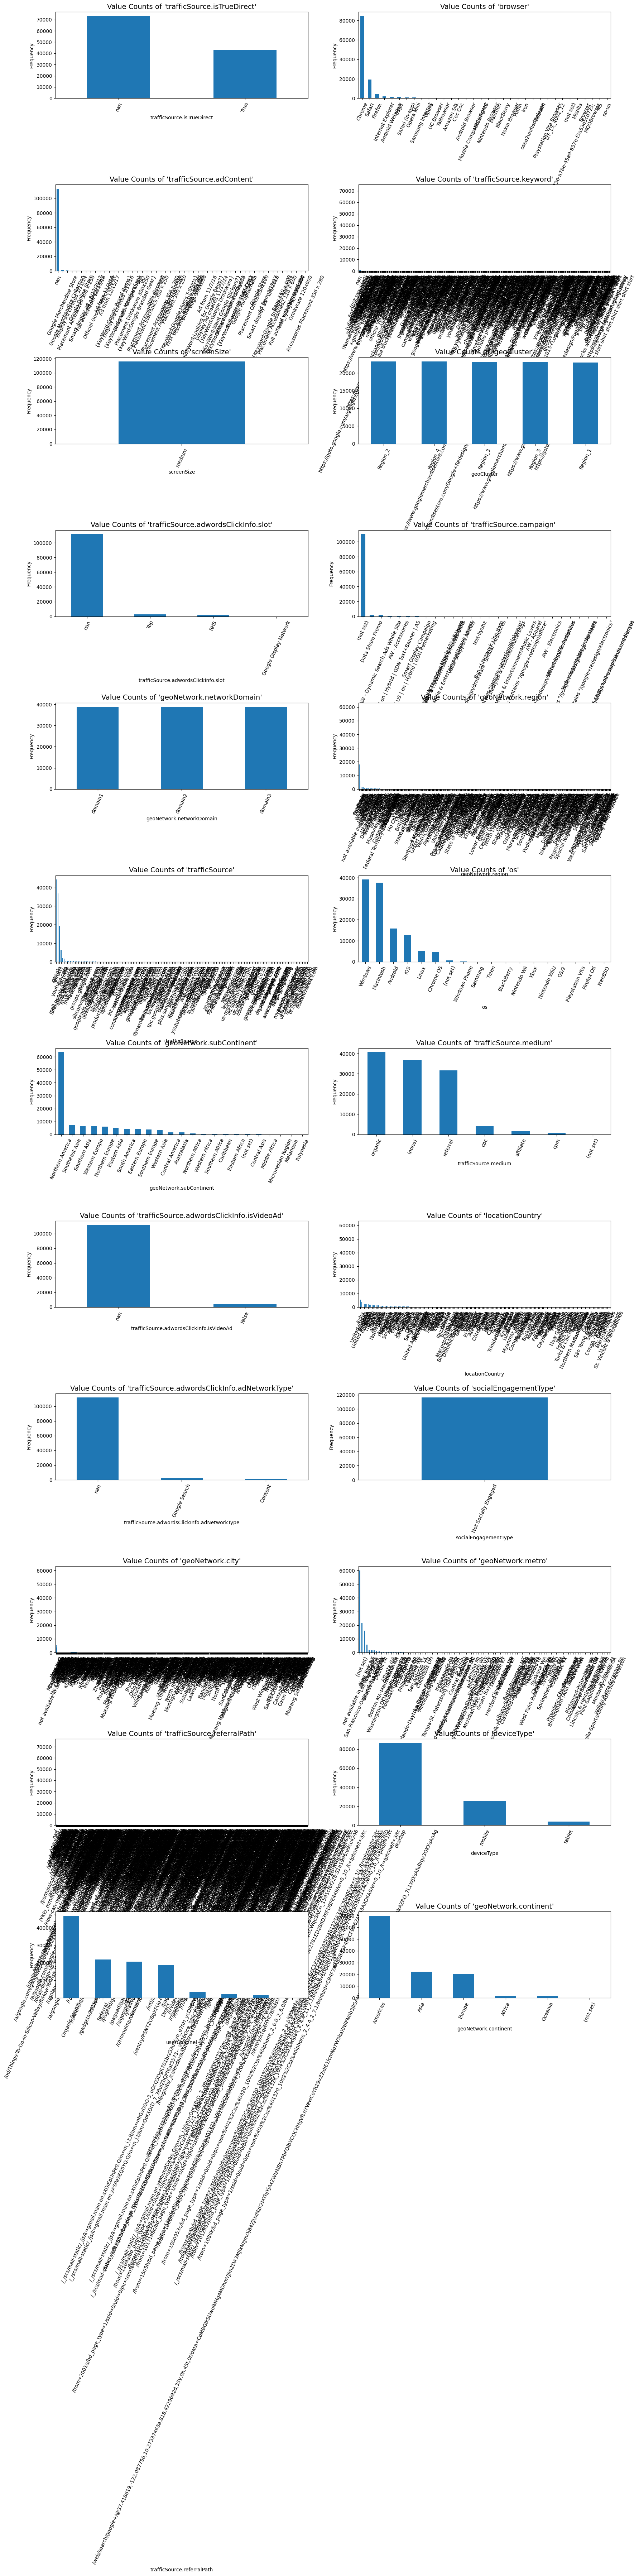

In [96]:
plot_object_column_bars(cleaned_train_df)

## Collapse rare categoris to "other" at 1% threshold function

In [97]:
def collapse_rare_categories_all_columns(df, threshold=0.01):
    """
    Replaces rare categories (below threshold) with 'Other' for all object-type columns.

    Parameters:
    - df: pd.DataFrame
    - threshold: float (frequency cutoff, e.g., 0.01 = 1%)

    Returns:
    - Modified DataFrame with rare values replaced by 'Other'
    """
    df_copy = df.copy()
    object_cols = df.select_dtypes(include='object').columns

    for col in object_cols:
        freq = df[col].value_counts(normalize=True, dropna=False)
        keep_values = freq[freq >= threshold].index
        df_copy[col] = df[col].apply(lambda x: x if x in keep_values else 'Other')

    return df_copy

In [98]:
new_train_df = collapse_rare_categories_all_columns(cleaned_train_df, threshold=0.01)

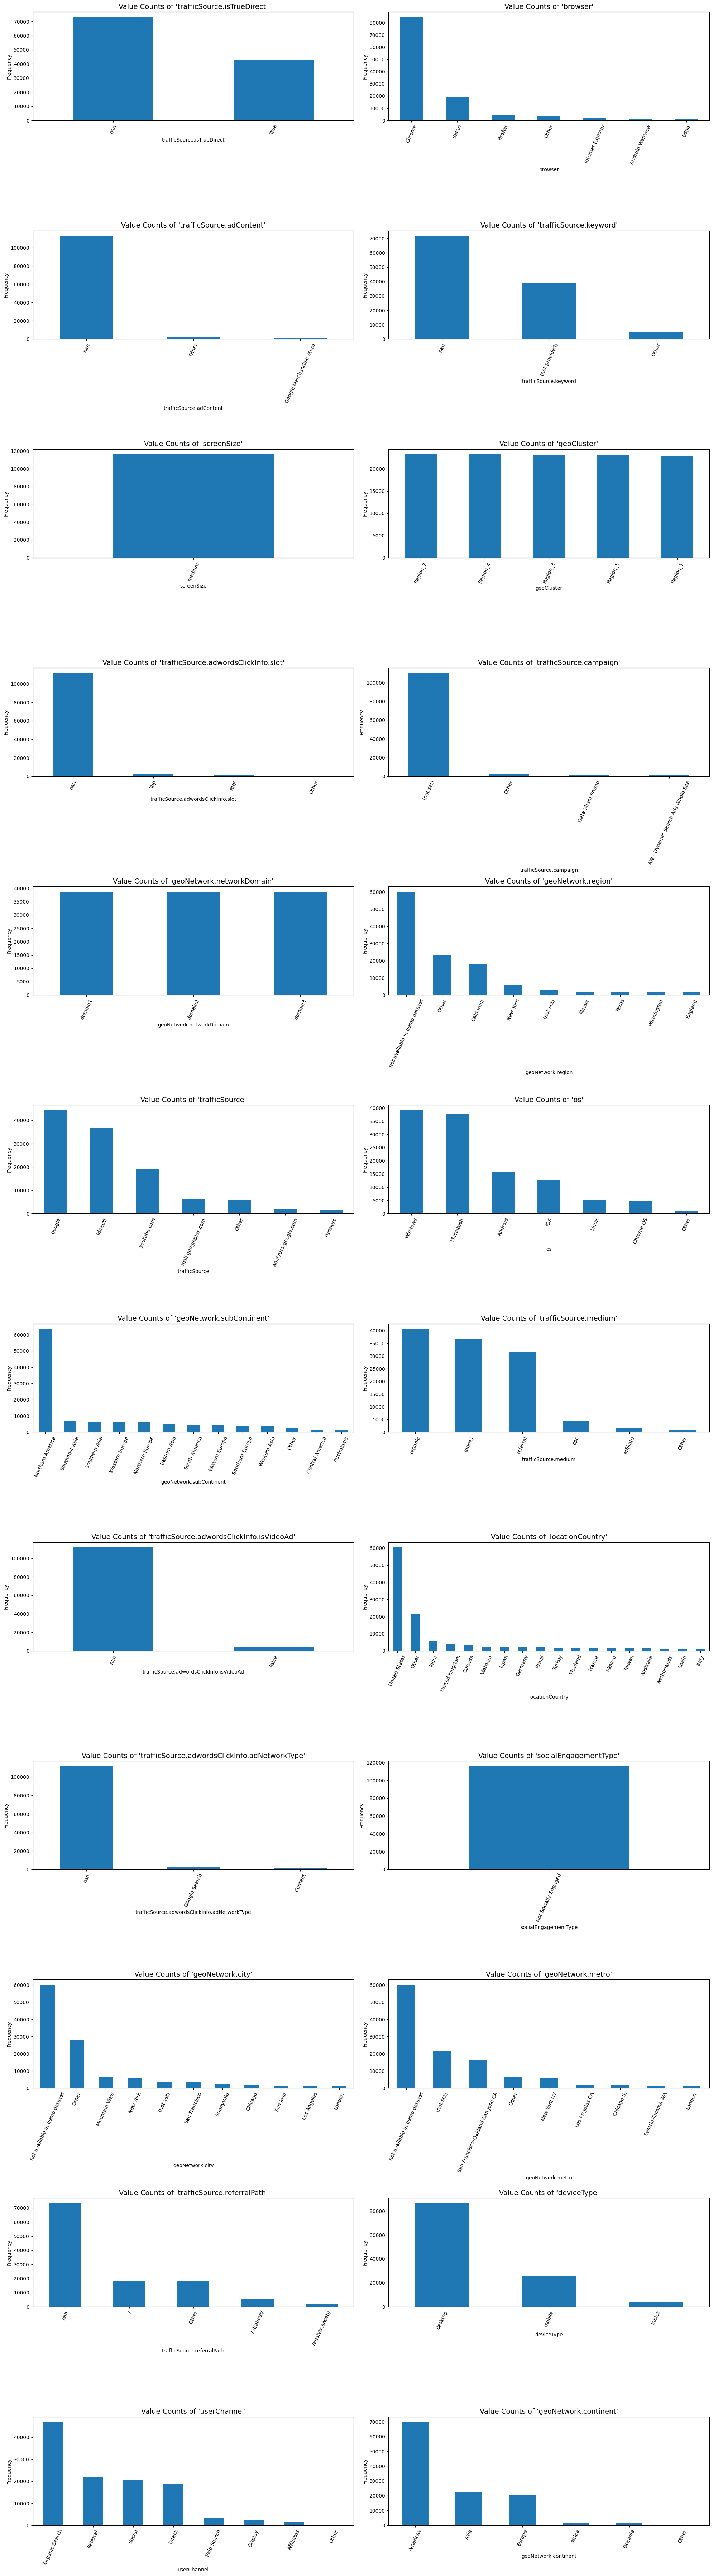

In [99]:
plot_object_column_bars(new_train_df)

# Drop unneccary col 

In [100]:
cleaned_train_df.columns


Index(['trafficSource.isTrueDirect', 'purchaseValue', 'browser',
       'trafficSource.adContent', 'trafficSource.keyword', 'screenSize',
       'geoCluster', 'trafficSource.adwordsClickInfo.slot', 'userId',
       'trafficSource.campaign', 'geoNetwork.networkDomain', 'gclIdPresent',
       'sessionNumber', 'geoNetwork.region', 'trafficSource', 'totals.visits',
       'sessionId', 'os', 'geoNetwork.subContinent', 'trafficSource.medium',
       'trafficSource.adwordsClickInfo.isVideoAd', 'locationCountry',
       'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType',
       'geoNetwork.city', 'trafficSource.adwordsClickInfo.page',
       'geoNetwork.metro', 'pageViews', 'locationZone',
       'trafficSource.referralPath', 'totals.bounces', 'date', 'deviceType',
       'userChannel', 'totalHits', 'sessionStart', 'geoNetwork.continent',
       'device.isMobile', 'new_visits'],
      dtype='object')

In [101]:
def drop_columns(df):
    """
    Drops specified columns from the DataFrame.

    Parameters:
    - df: pd.DataFrame

    Returns:
    - pd.DataFrame with specified columns dropped
    """
    columns_to_drop = ["trafficSource.adContent","trafficSource.keyword","screenSize","trafficSource.adwordsClickInfo.slot","trafficSource.campaign","trafficSource.adwordsClickInfo.adNetworkType","socialEngagementType","geoNetwork.city","geoNetwork.metro","geoNetwork.region","trafficSource.adwordsClickInfo.isVideoAd","trafficSource.adwordsClickInfo.page","trafficSource.referralPath","userId","sessionId","date","gclIdPresent","totals.visits","locationZone","device.isMobile"] 
    return df.drop(columns=columns_to_drop, errors='ignore')

In [102]:
dropped_train_df = drop_columns(new_train_df)

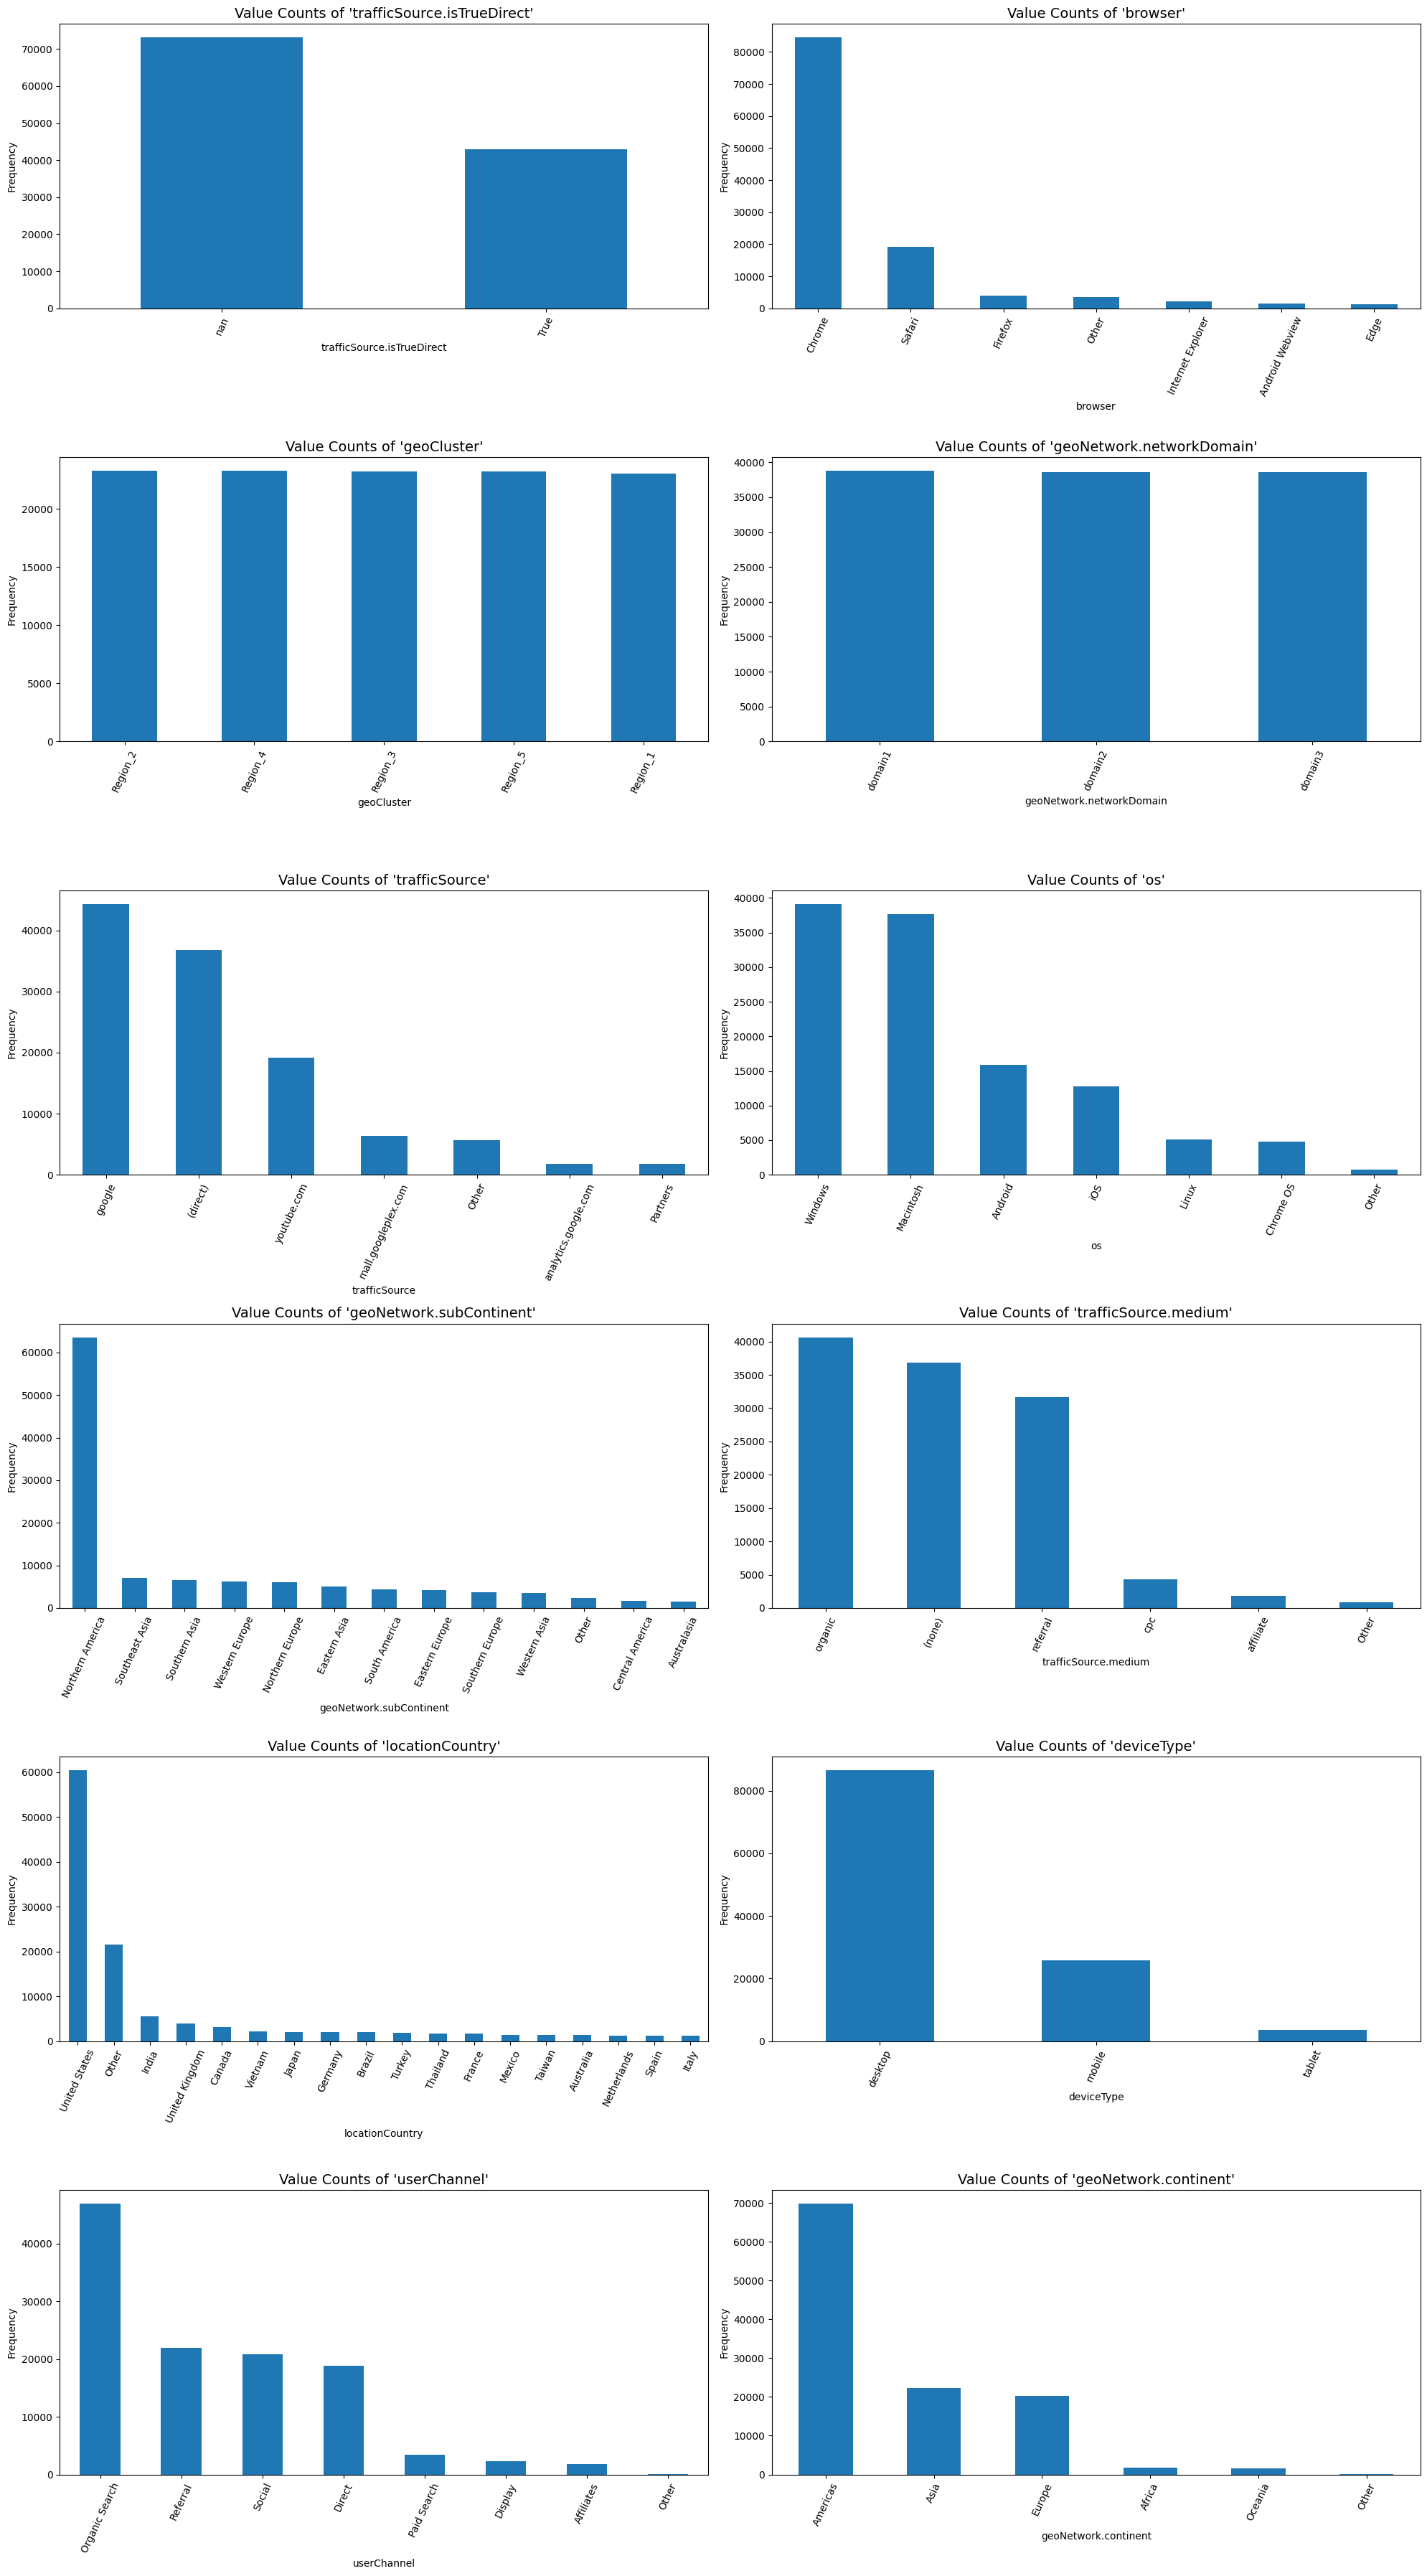

In [103]:
plot_object_column_bars(dropped_train_df)

## changing less frequent category as others

In [104]:
dropped_train_df.isnull().sum()

trafficSource.isTrueDirect    73133
purchaseValue                     0
browser                           0
geoCluster                        0
geoNetwork.networkDomain          0
sessionNumber                     0
trafficSource                     0
os                                0
geoNetwork.subContinent           0
trafficSource.medium              0
locationCountry                   0
pageViews                         8
totals.bounces                68875
deviceType                        0
userChannel                       0
totalHits                         0
sessionStart                      0
geoNetwork.continent              0
new_visits                    35505
dtype: int64

## Map less frequent category as other

In [105]:


def map_object_column_categories(df, keep_mapping):
    """
    For specified object columns, retains only given categories.
    All other values in those columns are replaced with 'Other'.

    Parameters:
    - df: pd.DataFrame
    - keep_mapping: dict
        Format: { "col_name": [list_of_categories_to_keep], ... }

    Returns:
    - Transformed DataFrame with selective mapping
    """
    df_copy = df.copy()
    
    for col, keep_values in keep_mapping.items():
        if col in df.columns:
            df_copy[col] = df[col].apply(lambda x: x if x in keep_values else 'Other')
    
    return df_copy

In [106]:
keep_mapping = {
    "browser": ["Chrome", "Safari"],
    "trafficSource": ["google", "(direct)","youtube.com","mall.googleplex.com"],
    "os" : ["Windows", "Macintosh", "Android", "iOS"],
    "geoNetwork.subContinent": ["Northern America"],
    "trafficSource.medium": ["organic", "referral"],
    "locationCountry": ["United States"],
    "userChannel" : ["Direct", "Social", "Referral","Organic Search"],
    "geoNetwork.continent": ["Americas","Asia","Europe"]
}

df_transformed = map_object_column_categories(dropped_train_df, keep_mapping)

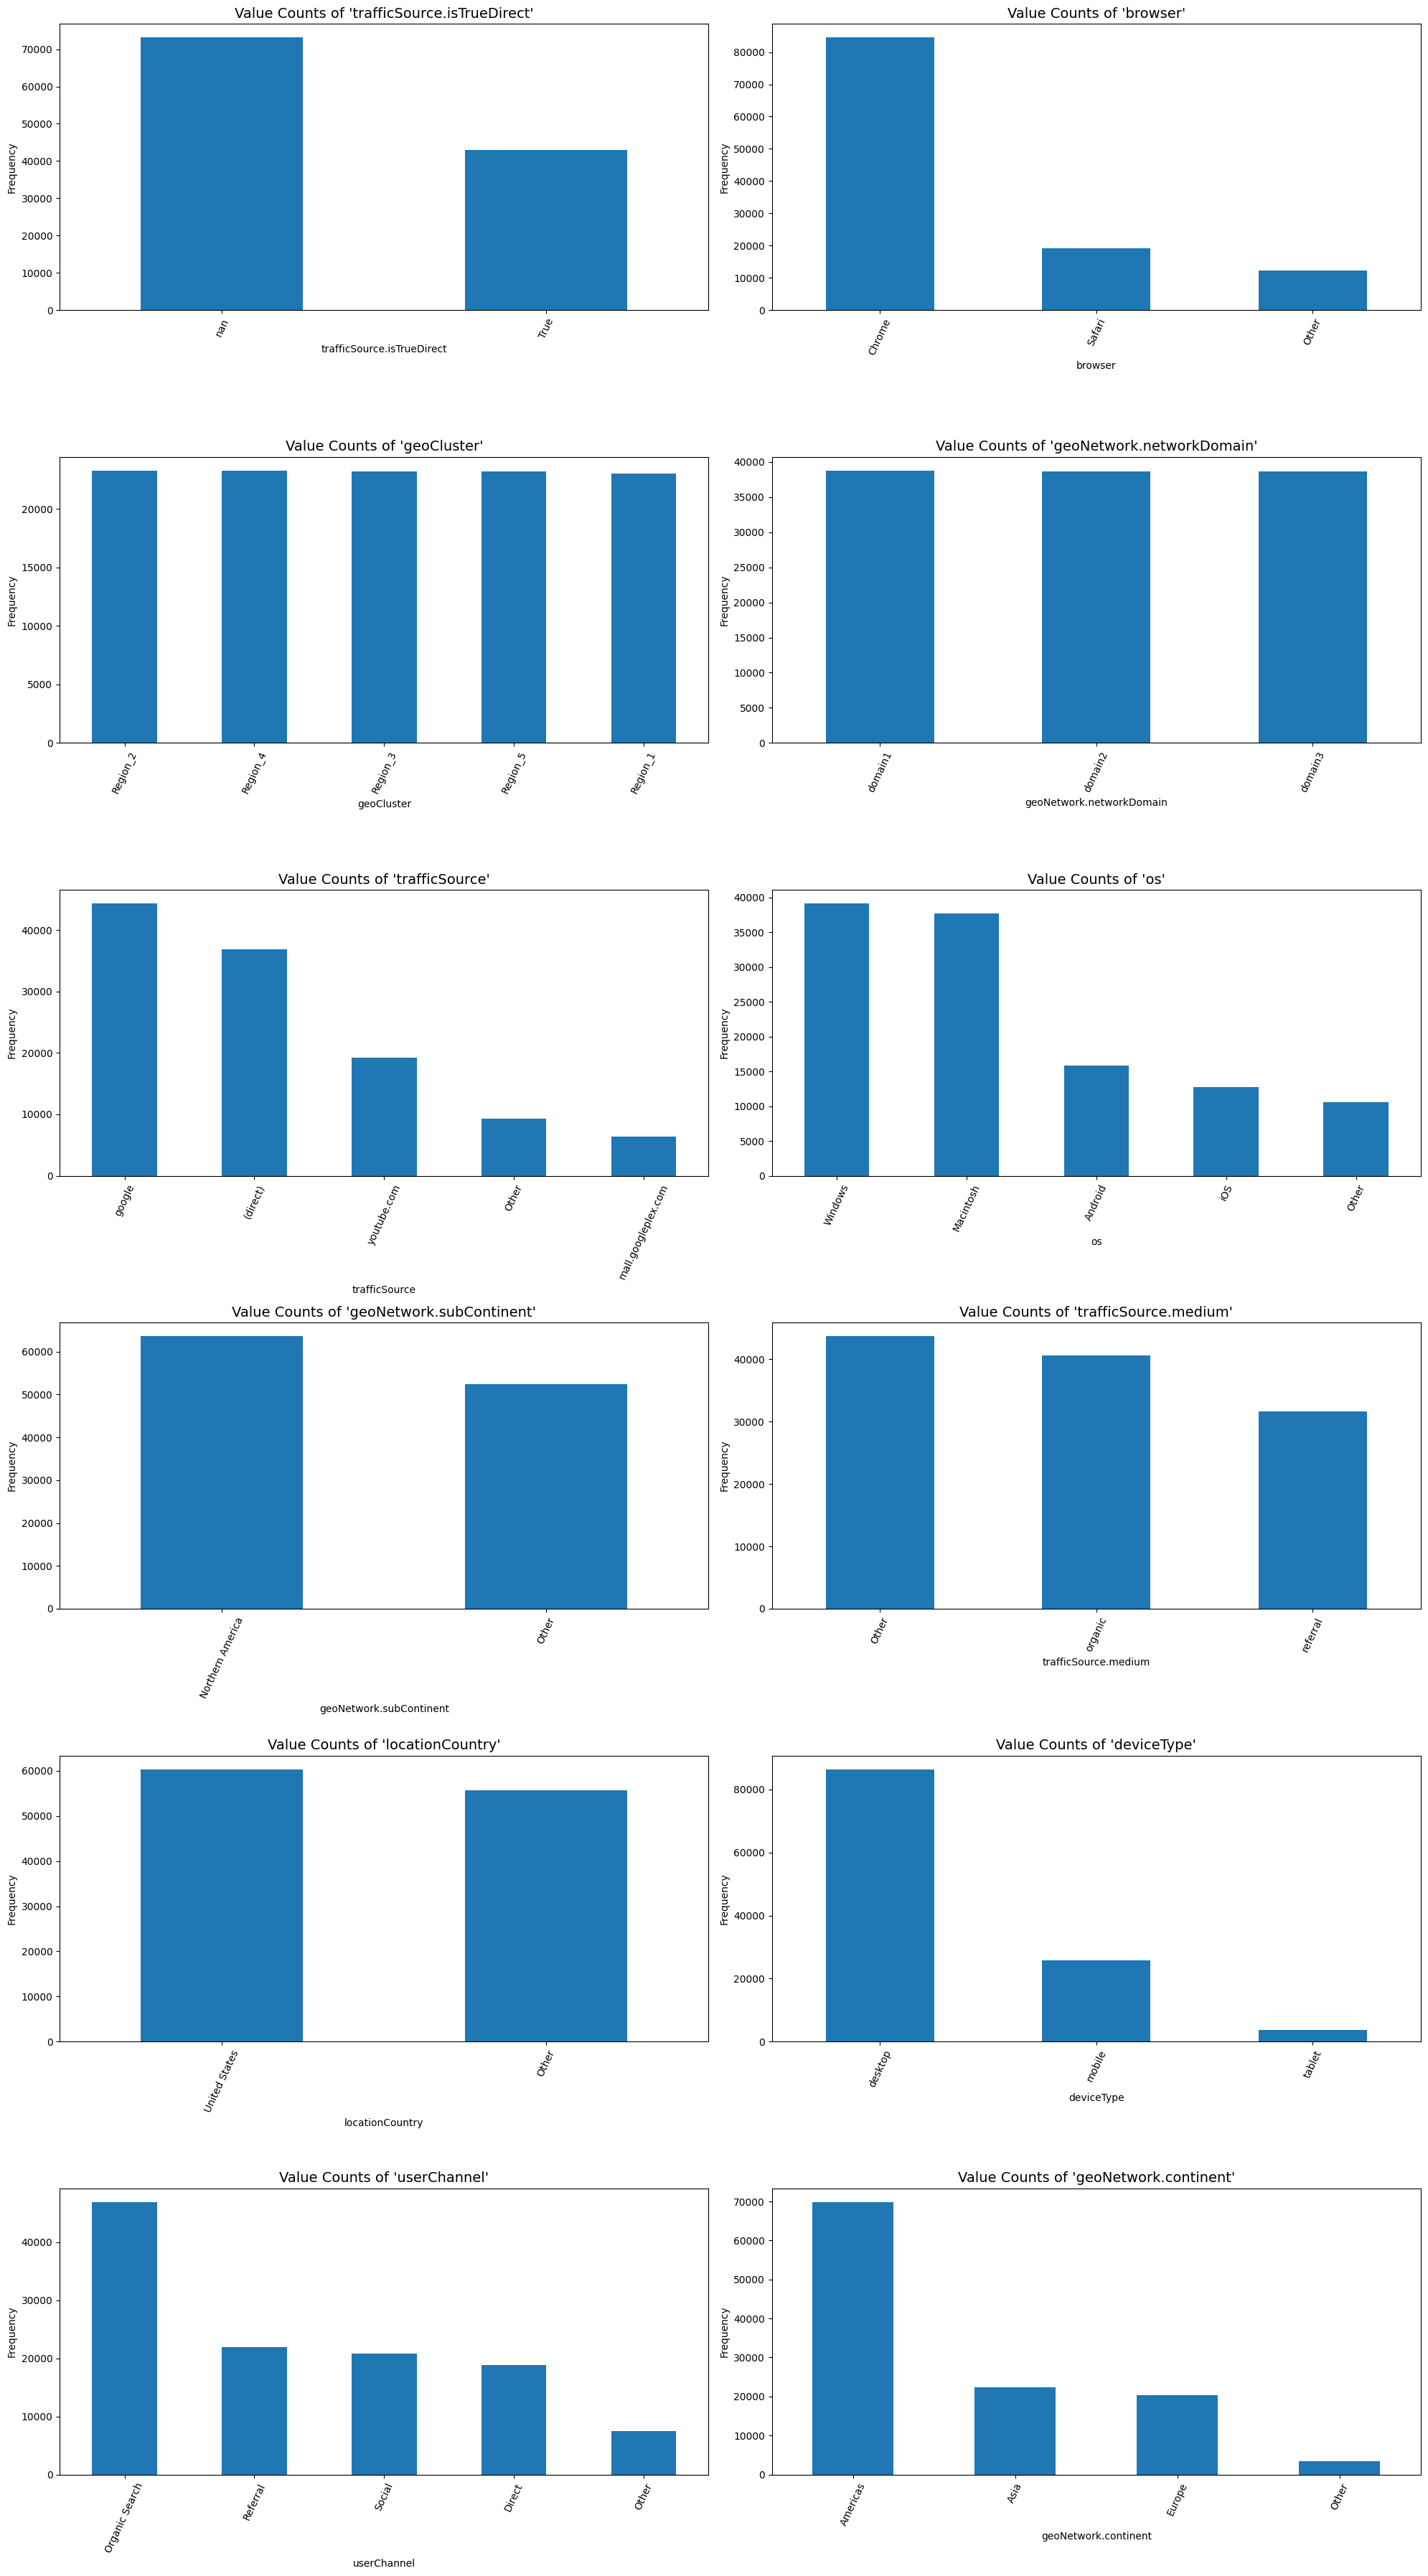

In [107]:
plot_object_column_bars(df_transformed)

In [108]:
df_transformed["trafficSource.isTrueDirect"] = df_transformed["trafficSource.isTrueDirect"].fillna("False")
df_transformed["deviceType"] = df_transformed["deviceType"].replace({"tablet": "mobile"})

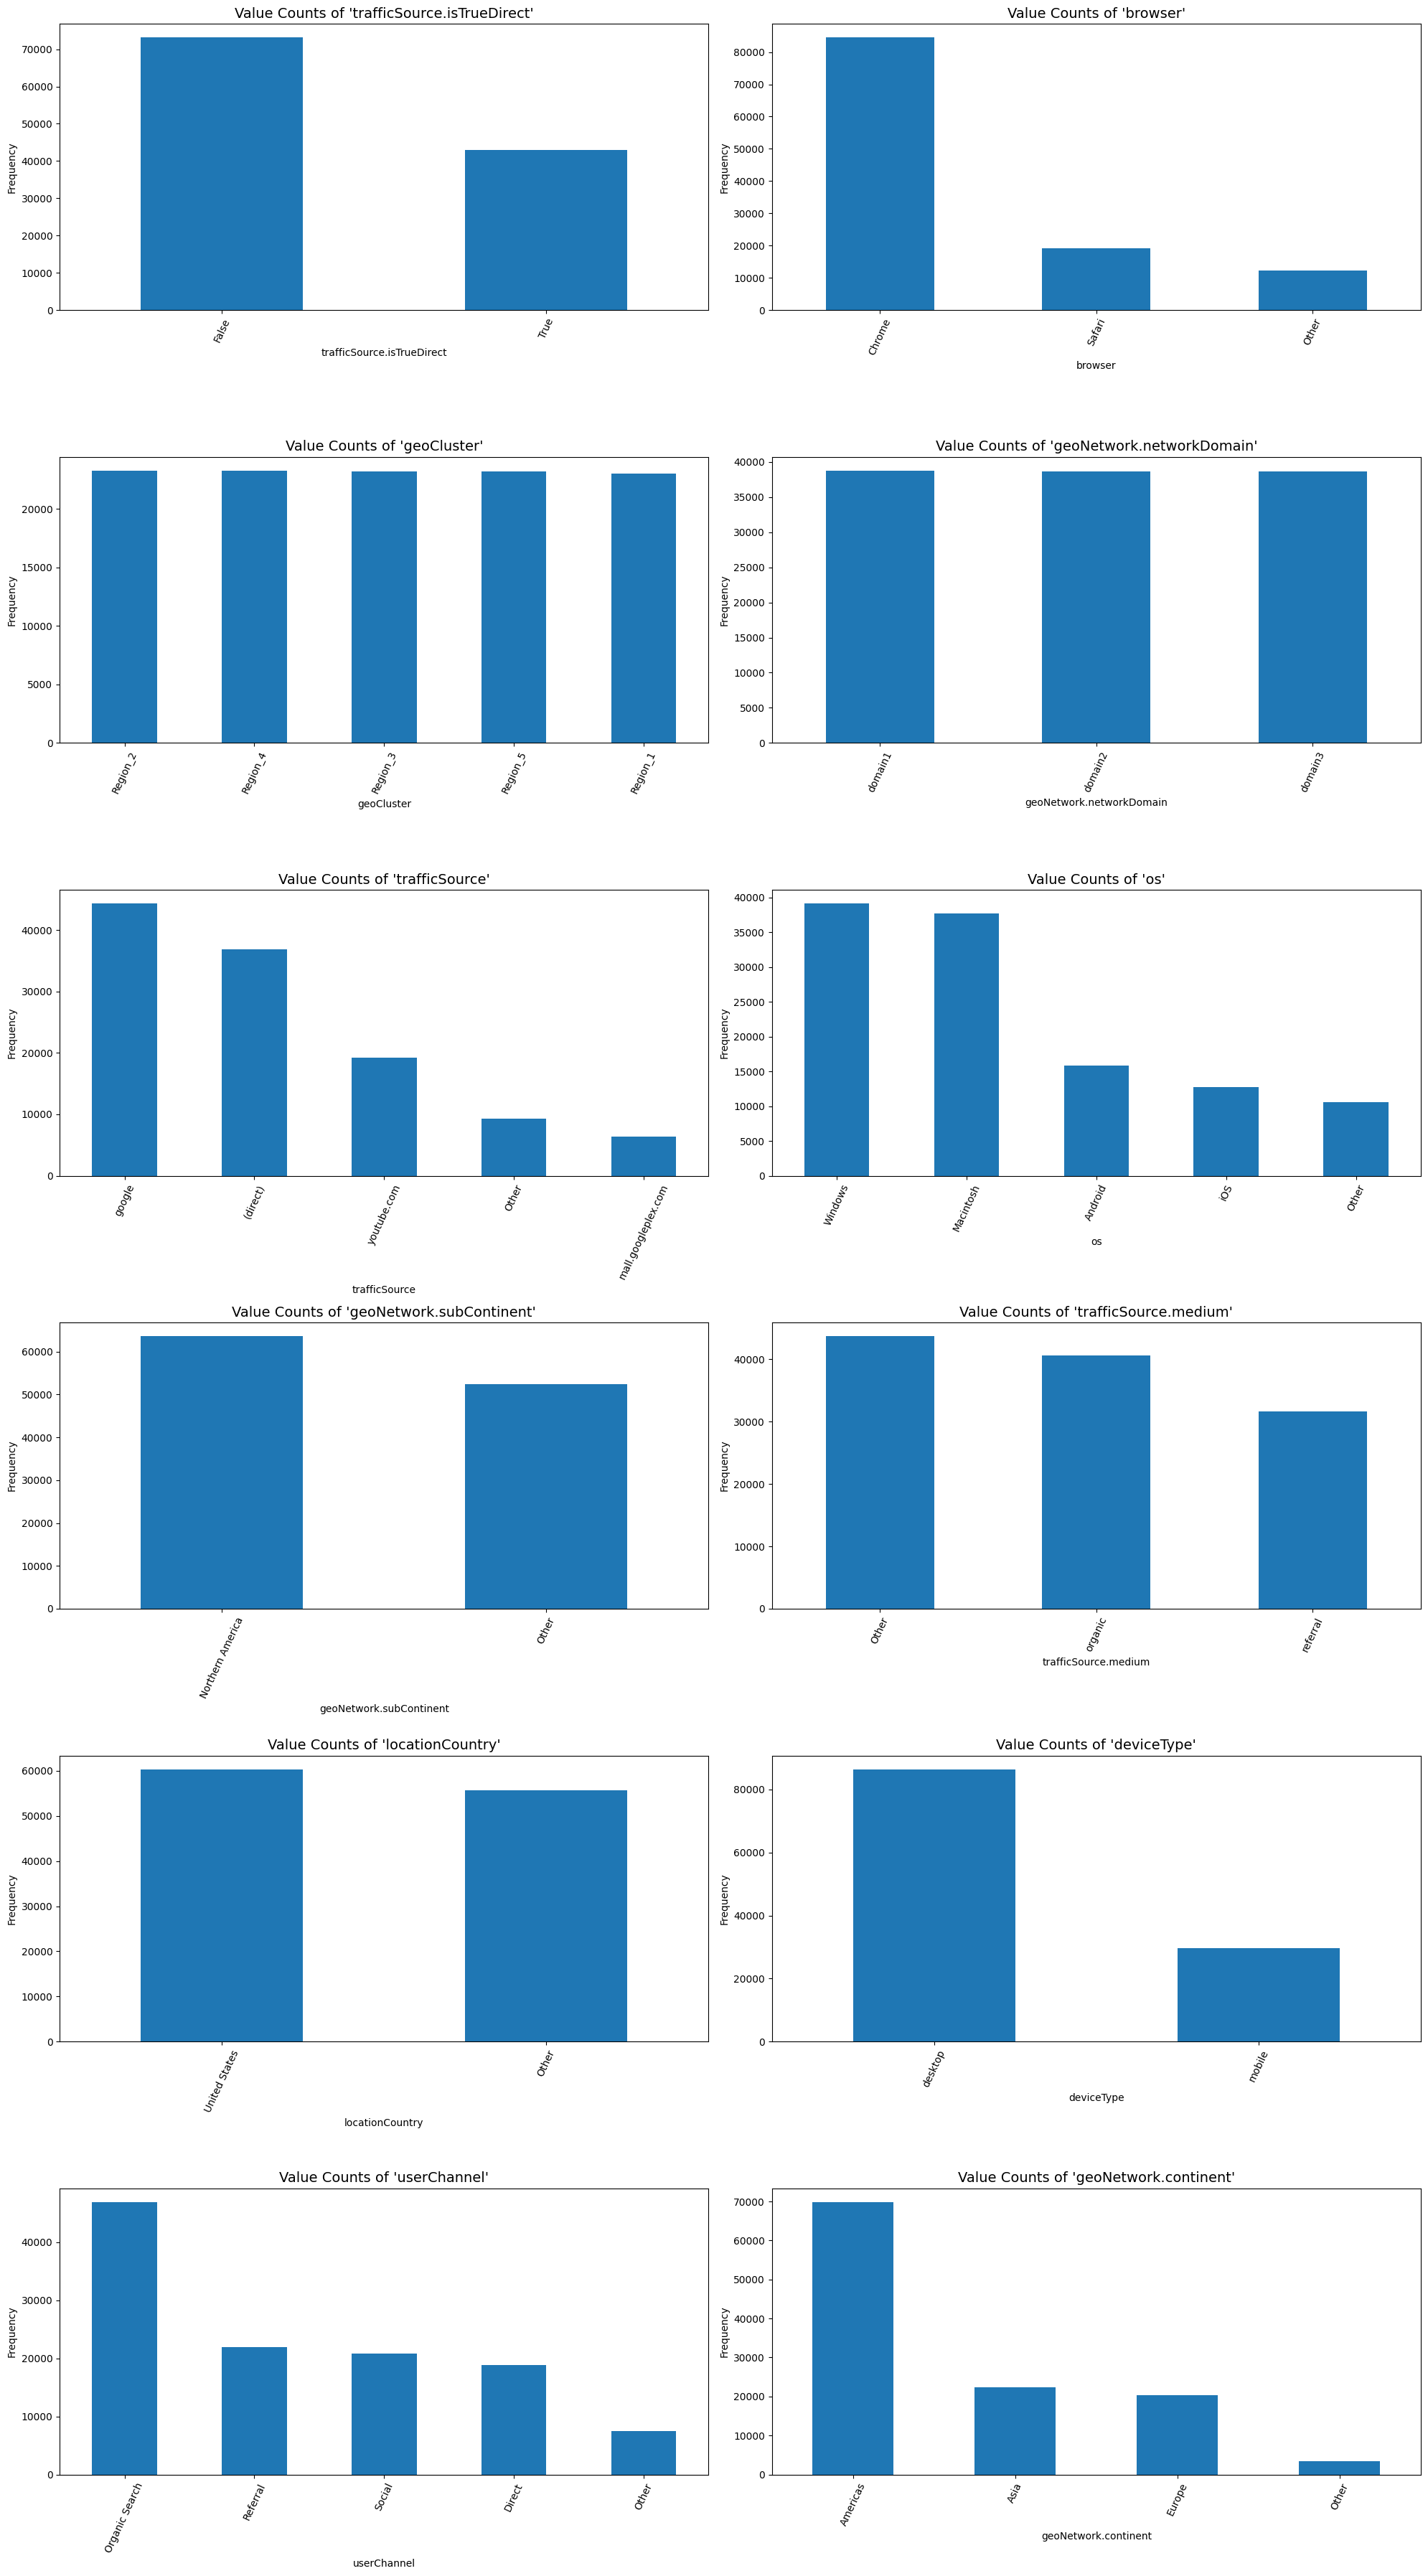

In [109]:
plot_object_column_bars(df_transformed)

In [110]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   trafficSource.isTrueDirect  116023 non-null  object 
 1   purchaseValue               116023 non-null  float64
 2   browser                     116023 non-null  object 
 3   geoCluster                  116023 non-null  object 
 4   geoNetwork.networkDomain    116023 non-null  object 
 5   sessionNumber               116023 non-null  int64  
 6   trafficSource               116023 non-null  object 
 7   os                          116023 non-null  object 
 8   geoNetwork.subContinent     116023 non-null  object 
 9   trafficSource.medium        116023 non-null  object 
 10  locationCountry             116023 non-null  object 
 11  pageViews                   116015 non-null  float64
 12  totals.bounces              47148 non-null   float64
 13  deviceType    

In [111]:
df_transformed.isnull().sum()

trafficSource.isTrueDirect        0
purchaseValue                     0
browser                           0
geoCluster                        0
geoNetwork.networkDomain          0
sessionNumber                     0
trafficSource                     0
os                                0
geoNetwork.subContinent           0
trafficSource.medium              0
locationCountry                   0
pageViews                         8
totals.bounces                68875
deviceType                        0
userChannel                       0
totalHits                         0
sessionStart                      0
geoNetwork.continent              0
new_visits                    35505
dtype: int64

## filling null Values

In [112]:
df_transformed["totals.bounces"] = df_transformed["totals.bounces"].fillna(0)
df_transformed["new_visits"] = df_transformed["new_visits"].fillna(0)
df_transformed["pageViews"] = df_transformed["pageViews"].fillna(df_transformed["pageViews"].median())

In [113]:
df_transformed.isnull().sum()


trafficSource.isTrueDirect    0
purchaseValue                 0
browser                       0
geoCluster                    0
geoNetwork.networkDomain      0
sessionNumber                 0
trafficSource                 0
os                            0
geoNetwork.subContinent       0
trafficSource.medium          0
locationCountry               0
pageViews                     0
totals.bounces                0
deviceType                    0
userChannel                   0
totalHits                     0
sessionStart                  0
geoNetwork.continent          0
new_visits                    0
dtype: int64

## box plot function

In [114]:
def plot_numeric_boxplots(df):
    """
    Plots boxplots for all numeric columns in the given DataFrame.

    Parameters:
    - df: pd.DataFrame
    """
    numeric_cols = df.select_dtypes(include='number').columns
    n_cols = len(numeric_cols)
    
    if n_cols == 0:
        print("No numeric columns found.")
        return

    # Layout: 2 columns per row
    n_cols_per_row = 2
    n_rows = (n_cols + n_cols_per_row - 1) // n_cols_per_row

    fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f"Boxplot of '{col}'")

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

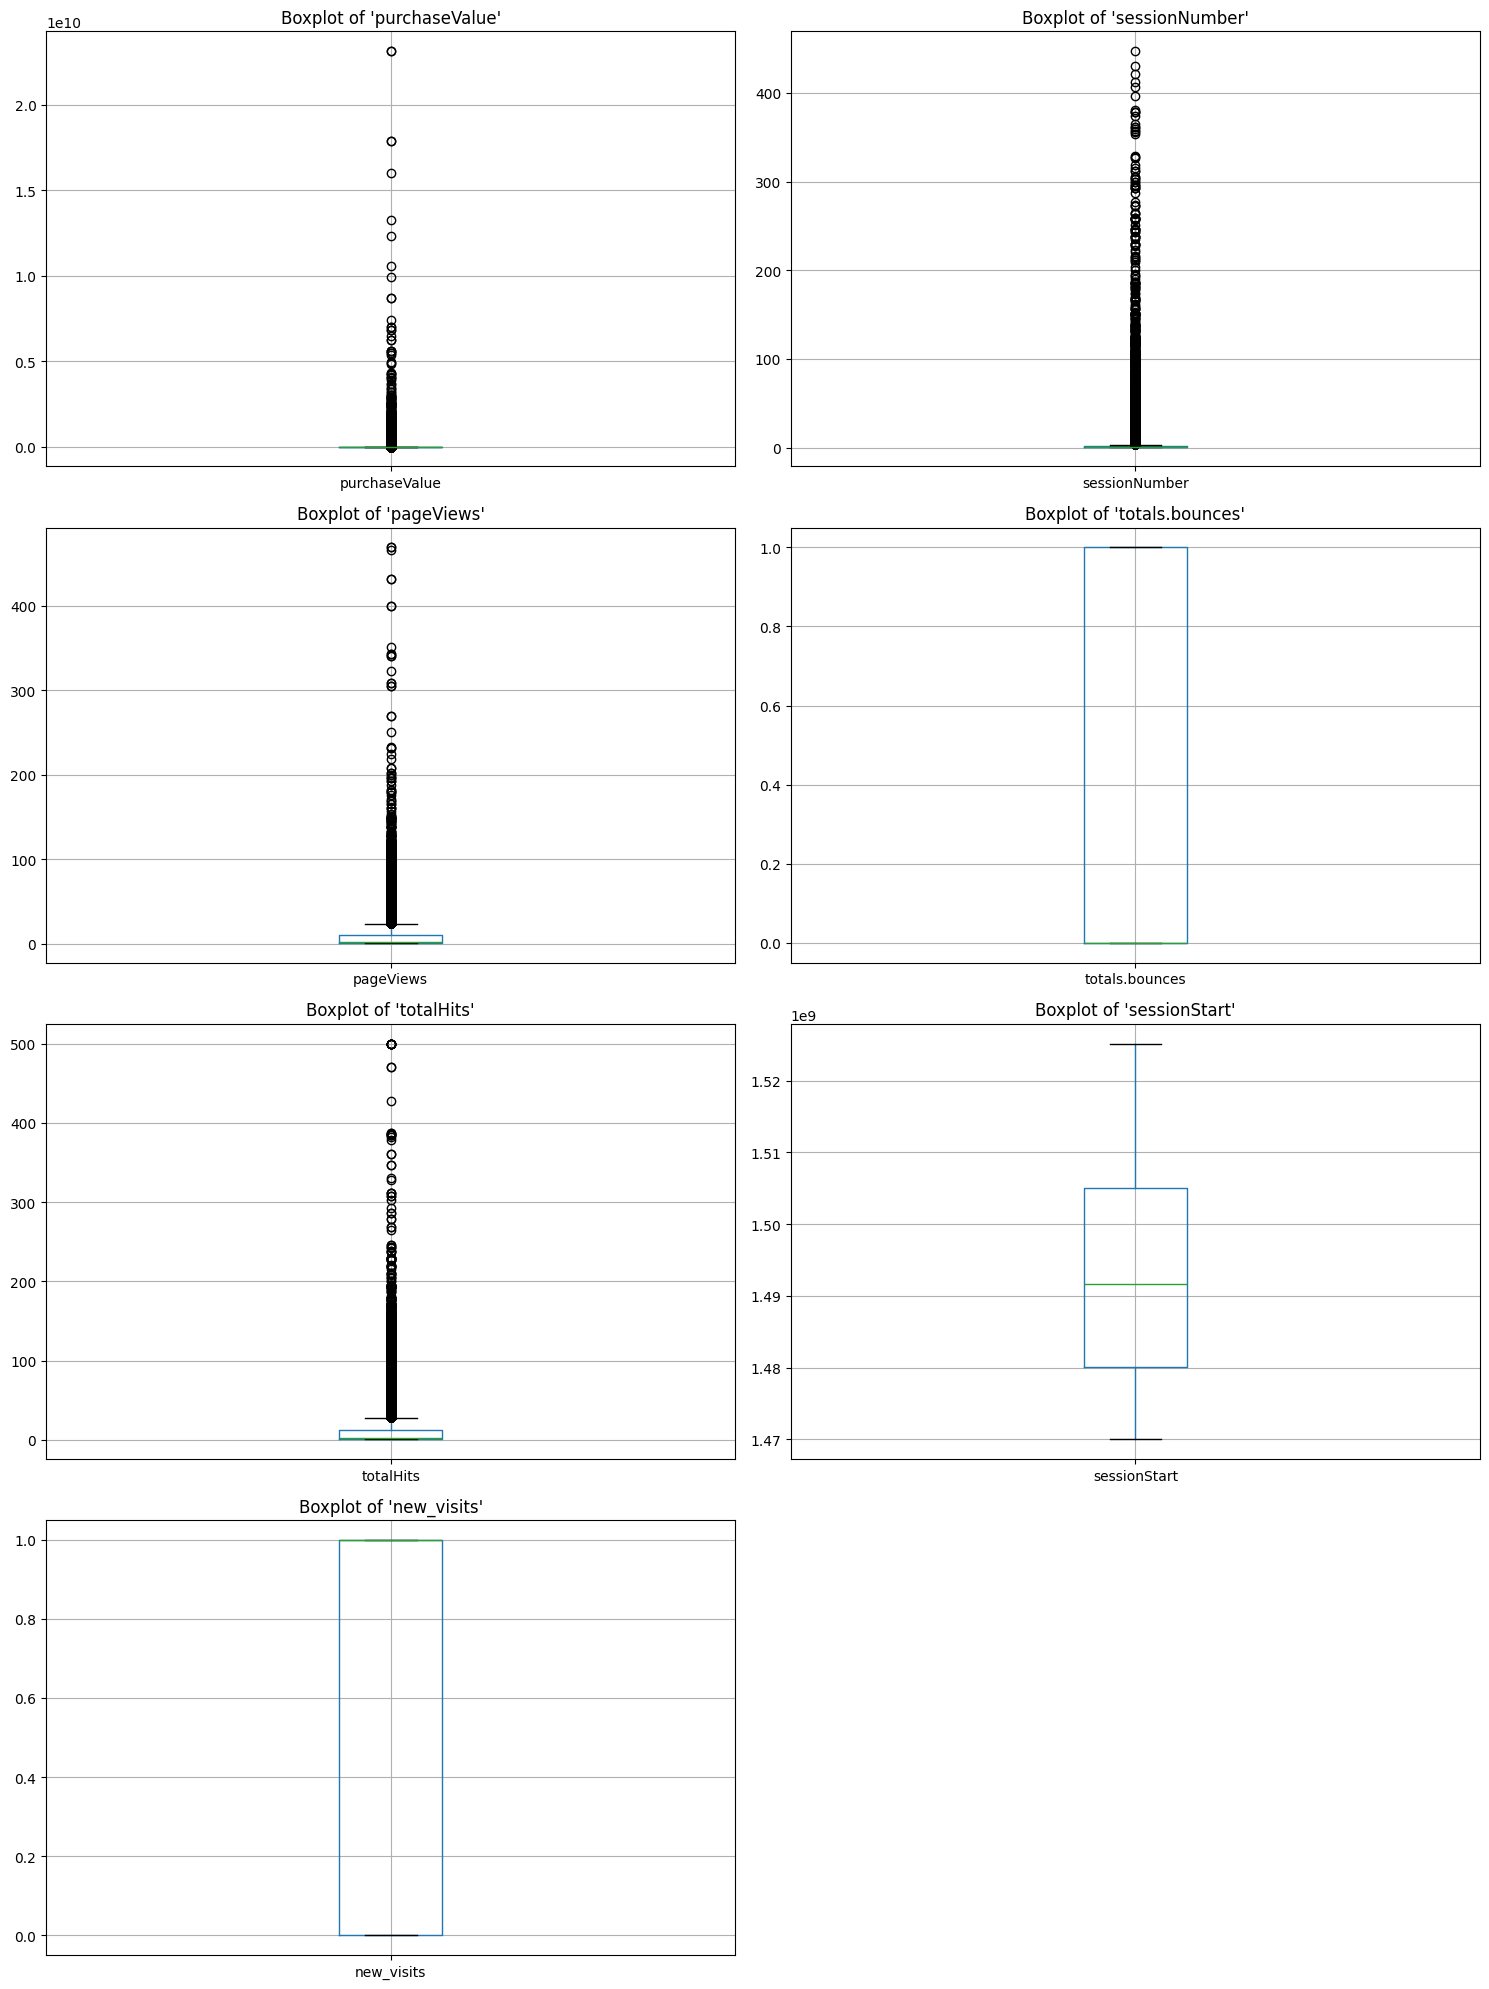

In [115]:
plot_numeric_boxplots(df_transformed)

## normal distribuion of numeric col

In [116]:
def plot_numeric_distributions(df):
    """
    Plots the distribution (histogram + KDE) of all numeric columns in the DataFrame.

    Parameters:
    - df: pd.DataFrame
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)

    if n_cols == 0:
        print("No numeric columns found.")
        return

    n_cols_per_row = 2
    n_rows = (n_cols + n_cols_per_row - 1) // n_cols_per_row

    fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], bins=30, color='skyblue')
        axes[i].set_title(f"Distribution of '{col}'")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

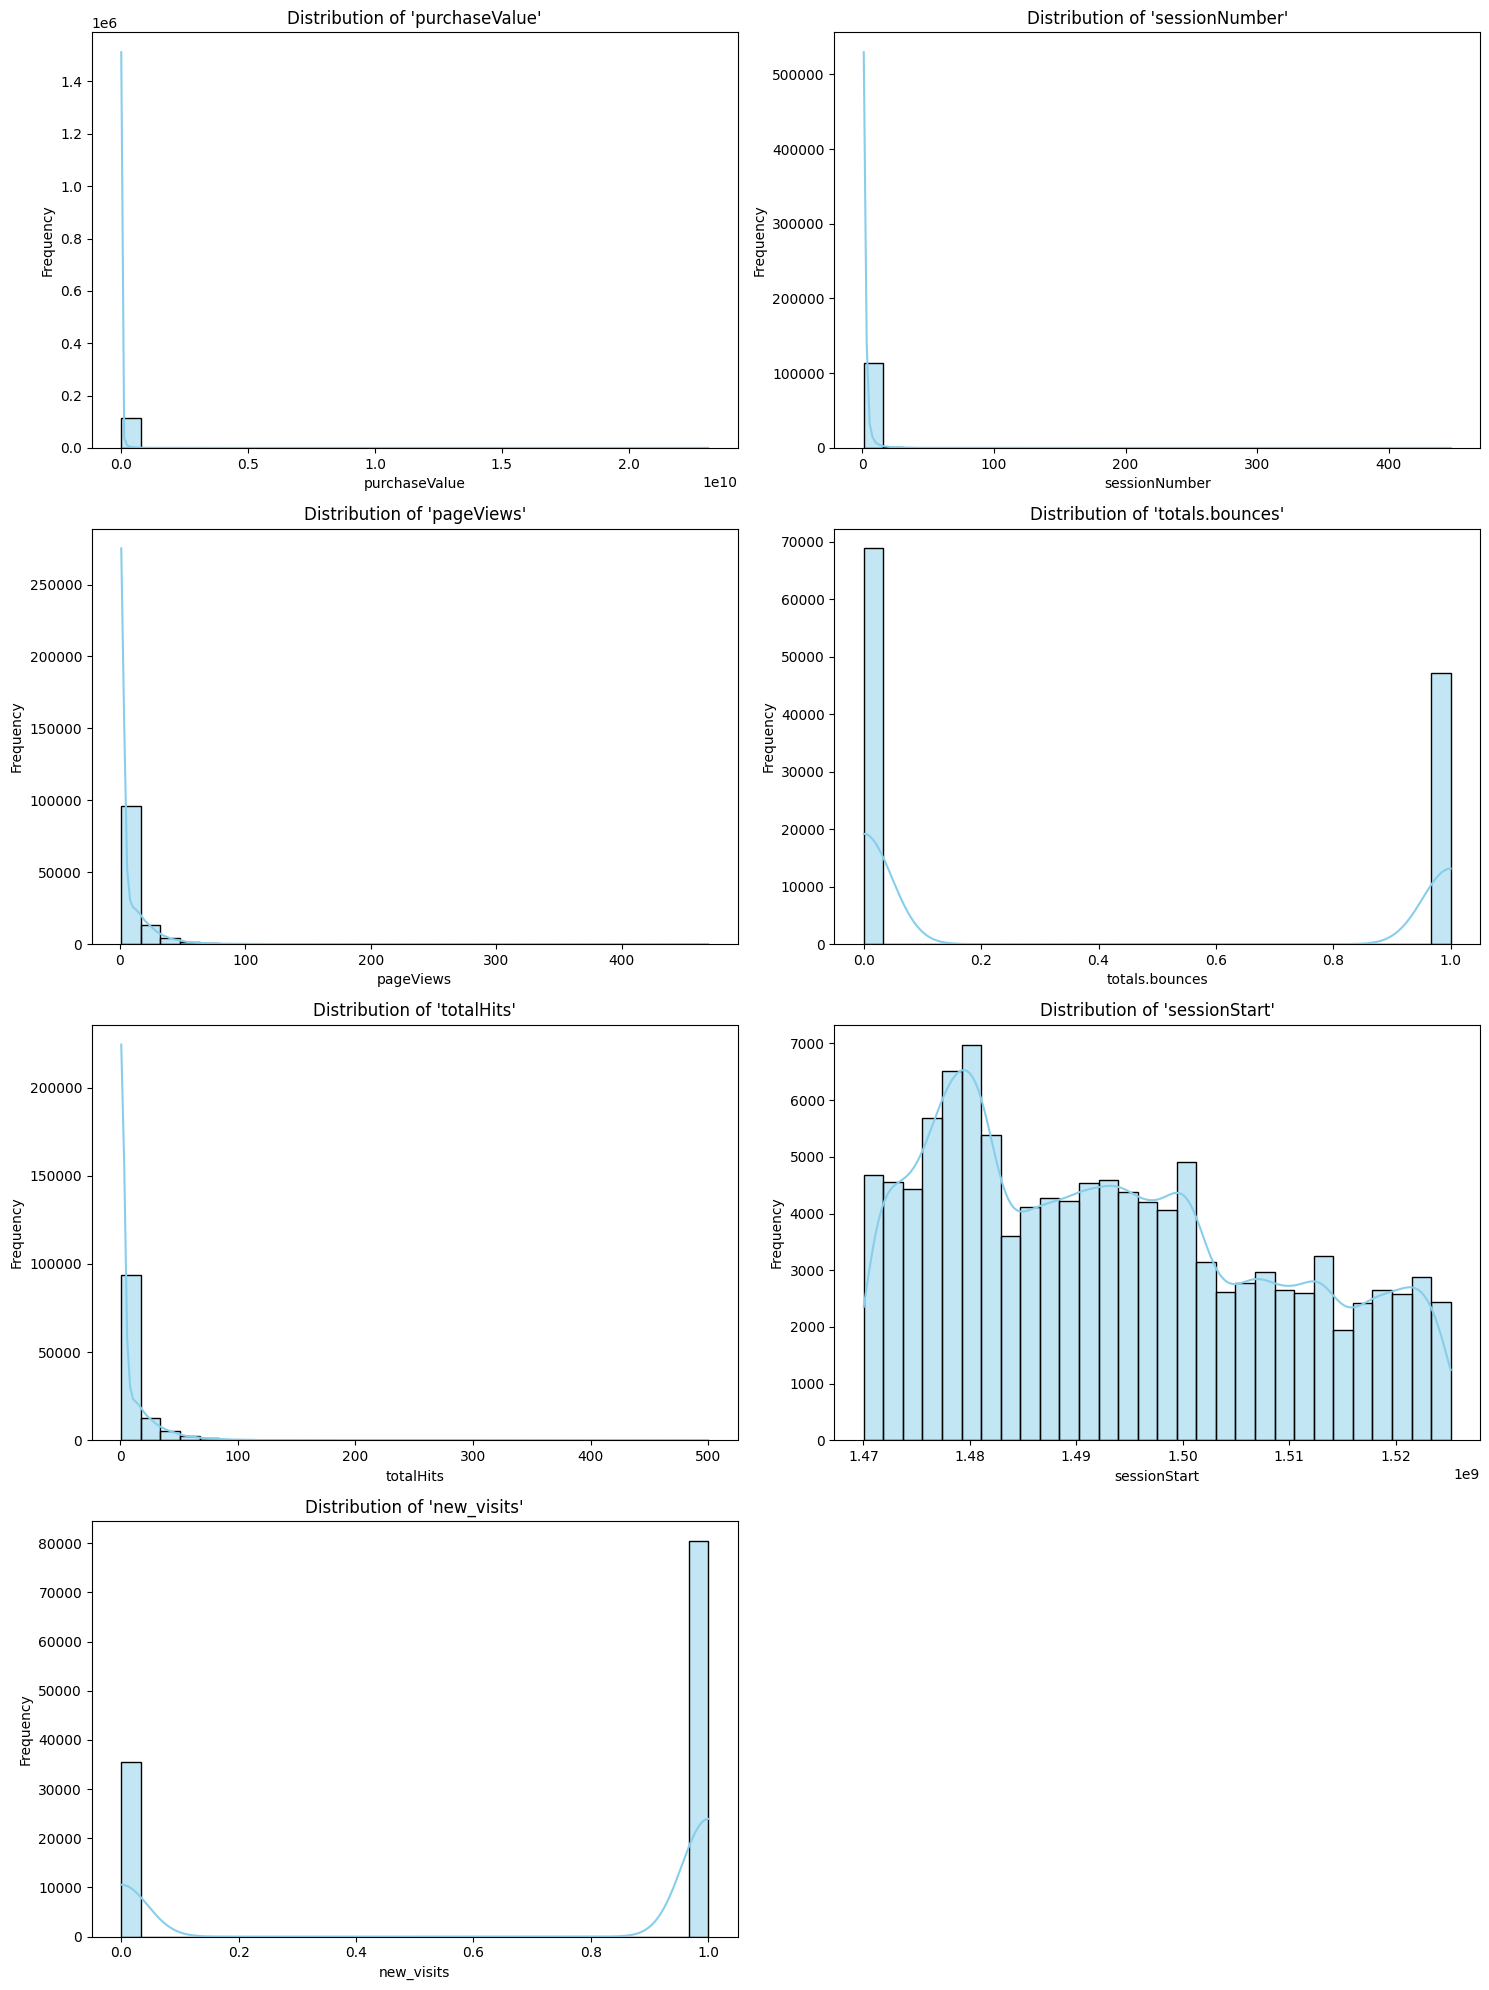

In [117]:
plot_numeric_distributions(df_transformed)

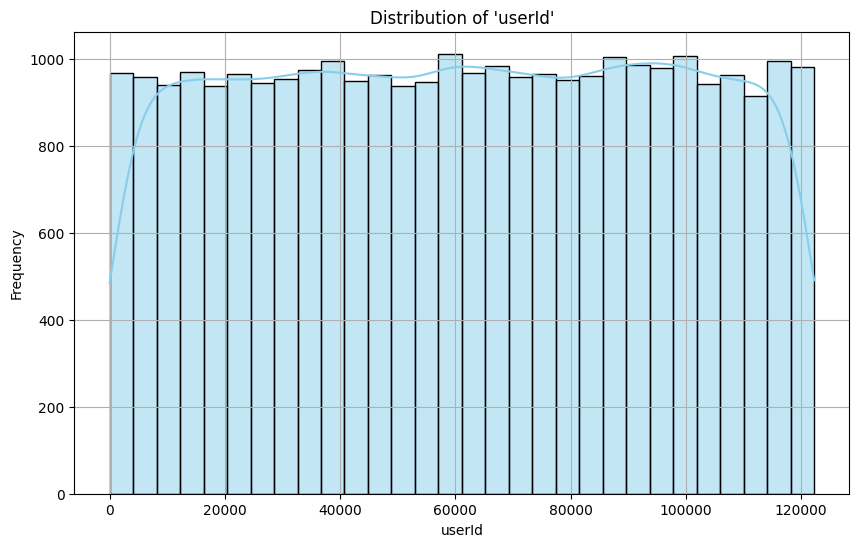

In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_test_df["userId"], kde=True, bins=30, color='skyblue')
plt.title("Distribution of 'userId'")
plt.xlabel("userId")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [119]:
cleaned_train_df["userId"].value_counts(ascending=False)

userId
34711     63
98503     59
39565     27
86785     27
67566     27
          ..
34242      1
105393     1
77252      1
43295      1
71050      1
Name: count, Length: 100499, dtype: int64

In [120]:
df_transformed.to_csv("data/train_transformed.csv", index=False)
print("Transformed training data saved to 'data/train_transformed.csv'.")

Transformed training data saved to 'data/train_transformed.csv'.


In [122]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   trafficSource.isTrueDirect  116023 non-null  object 
 1   purchaseValue               116023 non-null  float64
 2   browser                     116023 non-null  object 
 3   geoCluster                  116023 non-null  object 
 4   geoNetwork.networkDomain    116023 non-null  object 
 5   sessionNumber               116023 non-null  int64  
 6   trafficSource               116023 non-null  object 
 7   os                          116023 non-null  object 
 8   geoNetwork.subContinent     116023 non-null  object 
 9   trafficSource.medium        116023 non-null  object 
 10  locationCountry             116023 non-null  object 
 11  pageViews                   116023 non-null  float64
 12  totals.bounces              116023 non-null  float64
 13  deviceType    

In [123]:
df_transformed.select_dtypes(include="number").columns


Index(['purchaseValue', 'sessionNumber', 'pageViews', 'totals.bounces',
       'totalHits', 'sessionStart', 'new_visits'],
      dtype='object')

In [124]:
def plot_target_vs_numeric_features(df, target_col):
    """
    Plots scatter plots between the target column and all other numeric columns.

    Parameters:
    - df: pd.DataFrame
    - target_col: str, name of the target variable (e.g., 'purchaseValue')
    """
    numeric_cols = df.select_dtypes(include='number').columns
    numeric_cols = [col for col in numeric_cols if col != target_col]

    n_cols = len(numeric_cols)
    n_cols_per_row = 2
    n_rows = (n_cols + n_cols_per_row - 1) // n_cols_per_row

    fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.scatterplot(data=df, x=col, y=target_col, ax=axes[i], alpha=0.5)
        axes[i].set_title(f"{target_col} vs {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_col)

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

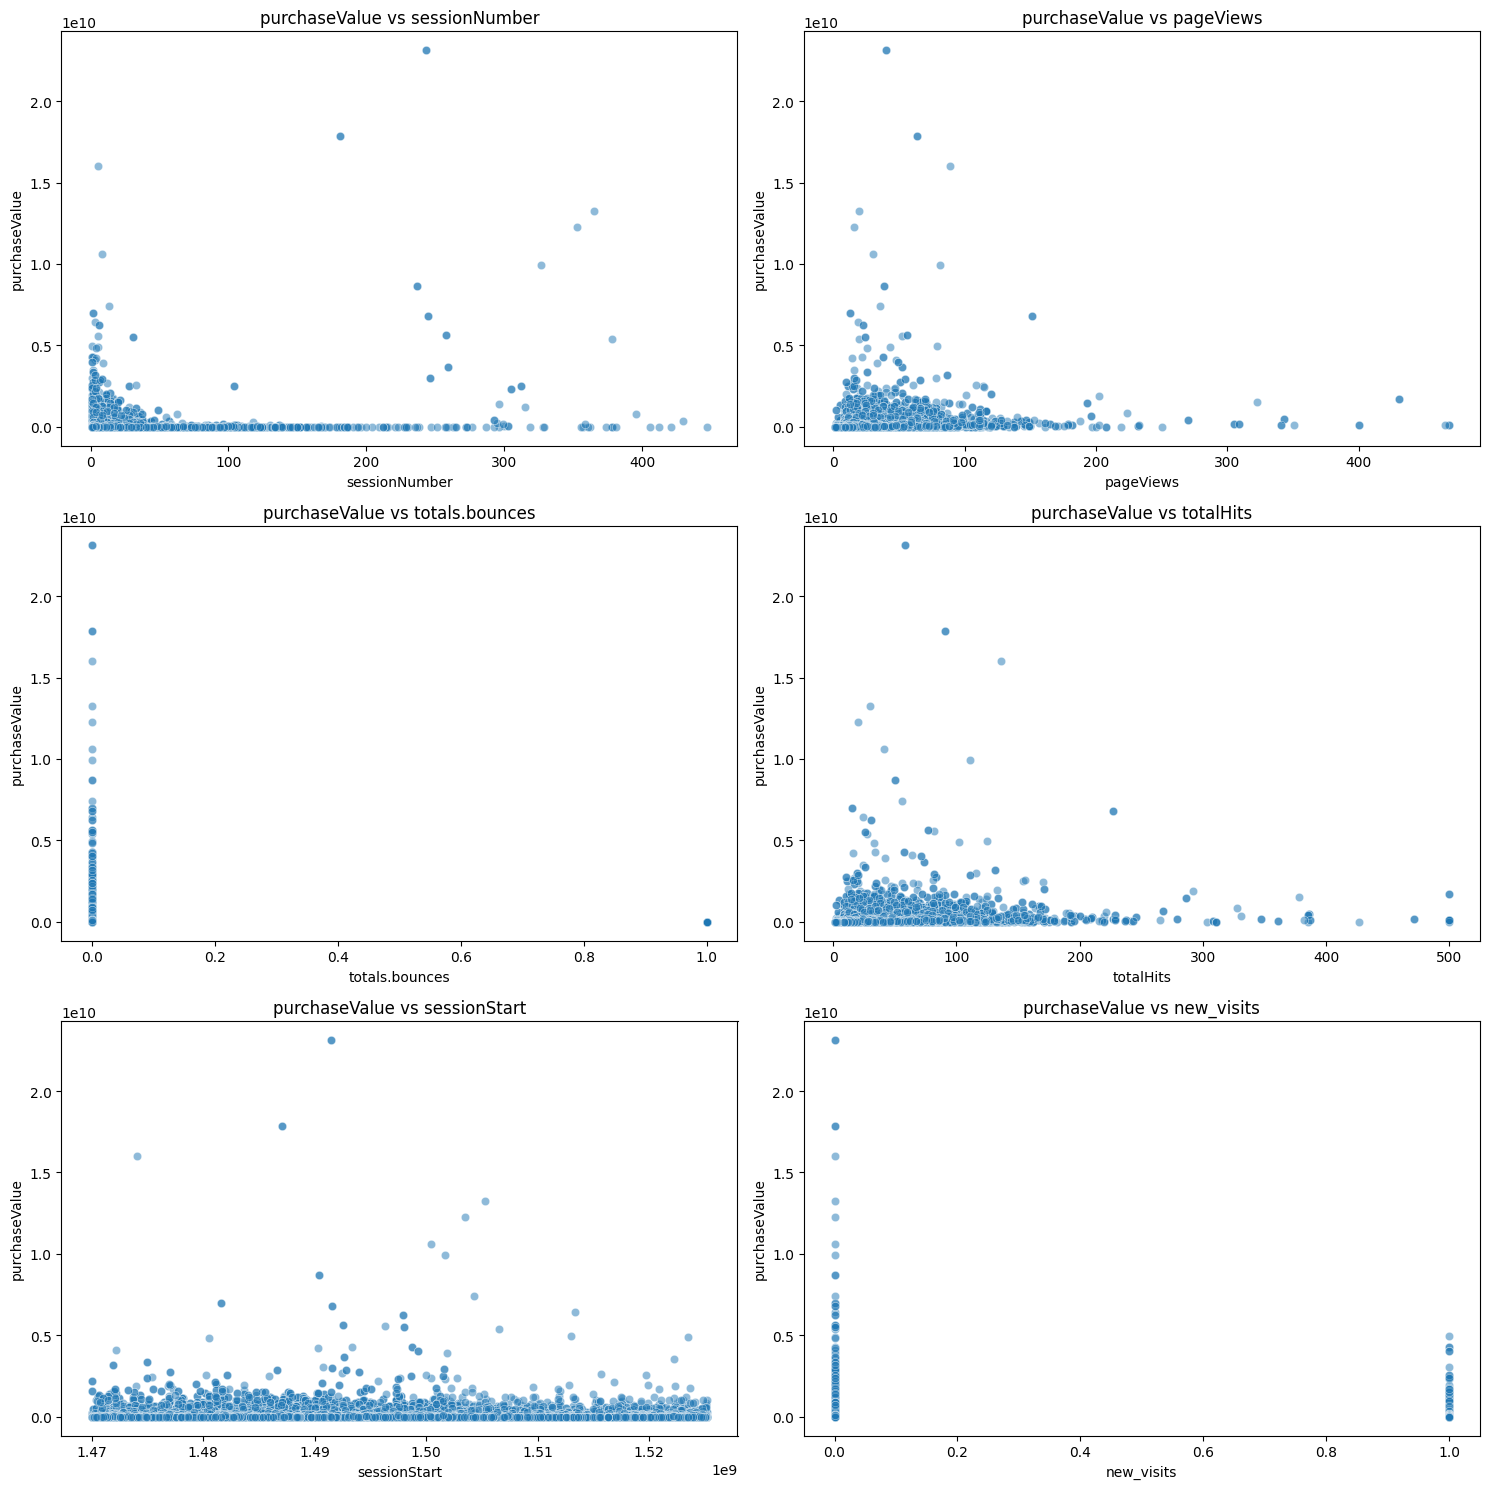

In [125]:
plot_target_vs_numeric_features(df_transformed, "purchaseValue")

In [126]:
df_transformed

trafficSource.isTrueDirect  purchaseValue browser geoCluster  \
0                           False            0.0   Other   Region_2   
1                            True            0.0  Chrome   Region_3   
2                            True            0.0  Chrome   Region_2   
3                           False            0.0   Other   Region_4   
4                            True     88950000.0  Chrome   Region_3   
...                           ...            ...     ...        ...   
116018                      False     35180000.0  Chrome   Region_3   
116019                       True            0.0  Chrome   Region_5   
116020                       True            0.0  Chrome   Region_1   
116021                      False            0.0  Chrome   Region_5   
116022                       True     81470000.0  Chrome   Region_5   

       geoNetwork.networkDomain  sessionNumber trafficSource         os  \
0                       domain1              1   youtube.com    Windows   
1                       domain3              1      (direct)  Macintosh   
2                       domain1              2        google    Windows   
3                       domain3              1   youtube.com    Windows   
4                       domain1              1      (direct)    Windows   
...                         ...            ...           ...        ...   
116018                  domain1              1      (direct)  Macintosh   
116019                  domain2              1      (direct)  Macintosh   
116020                  domain2              2         Other    Windows   
116021                  domain1              1        google    Windows   
116022                  domain2              4        google    Android   

       geoNetwork.subContinent trafficSource.medium locationCountry  \
0             Northern America             referral   United States   
1             Northern America                Other   United States   
2                        Other              organic           Other   
3                        Other             referral           Other   
4             Northern America                Other   United States   
...                        ...                  ...             ...   
116018        Northern America                Other   United States   
116019        Northern America                Other   United States   
116020                   Other             referral           Other   
116021        Northern America              organic   United States   
116022        Northern America              organic           Other   

        pageViews  totals.bounces deviceType     userChannel  totalHits  \
0             1.0             1.0    desktop          Social          1   
1             1.0             1.0    desktop          Direct          1   
2             6.0             0.0    desktop  Organic Search          6   
3             1.0             1.0    desktop          Social          1   
4            54.0             0.0    desktop          Direct         66   
...           ...             ...        ...             ...        ...   
116018       26.0             0.0    desktop        Referral         28   
116019        1.0             1.0    desktop          Direct          1   
116020        1.0             1.0    desktop        Referral          1   
116021        2.0             0.0    desktop  Organic Search          2   
116022       73.0             0.0     mobile  Organic Search        102   

        sessionStart geoNetwork.continent  new_visits  
0         1500100799             Americas         1.0  
1         1495262065             Americas         1.0  
2         1508510328               Europe         0.0  
3         1483431838                 Asia         1.0  
4         1475804633             Americas         1.0  
...              ...                  ...         ...  
116018    1500318402             Americas         1.0  
116019    1478624150             Americas         1

## Feature extractioon of SessionStart date


In [127]:
df_transformed_copy = df_transformed.copy()

In [128]:
# converting sessionstart to datetime
df_transformed_copy['sessionStart'] = pd.to_datetime(df_transformed_copy['sessionStart'], unit='s')
df_transformed_copy['sessionStart'].head()

0   2017-07-15 06:39:59
1   2017-05-20 06:34:25
2   2017-10-20 14:38:48
3   2017-01-03 08:23:58
4   2016-10-07 01:43:53
Name: sessionStart, dtype: datetime64[ns]

In [129]:
# extract hour of day

df_transformed_copy['hour'] = df_transformed_copy['sessionStart'].dt.hour
df_transformed_copy['hour'].head()

0     6
1     6
2    14
3     8
4     1
Name: hour, dtype: int32

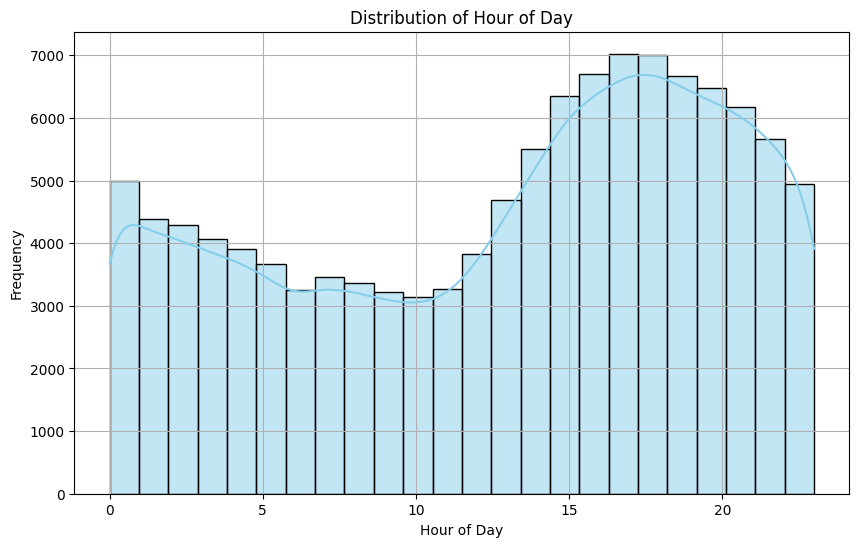

In [130]:
plt.figure(figsize=(10, 6))
sns.histplot(df_transformed_copy['hour'], bins=24, kde=True, color='skyblue')
plt.title("Distribution of Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [131]:
# day of week 
df_transformed_copy['dayofweek'] = df_transformed_copy['sessionStart'].dt.dayofweek
df_transformed_copy['dayofweek'].head()

0    5
1    5
2    4
3    1
4    4
Name: dayofweek, dtype: int32

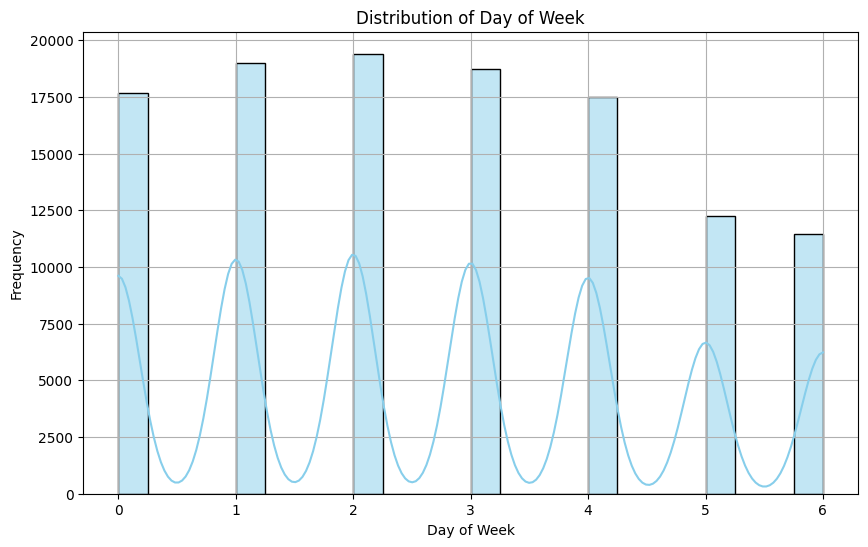

In [132]:
plt.figure(figsize=(10, 6))
sns.histplot(df_transformed_copy['dayofweek'], bins=24, kde=True, color='skyblue')
plt.title("Distribution of Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [133]:
# weekend 
df_transformed_copy['isWeekend'] = df_transformed_copy['dayofweek'].isin([5, 6]).astype(int)
df_transformed_copy['isWeekend'].head()

0    1
1    1
2    0
3    0
4    0
Name: isWeekend, dtype: int64

<Axes: xlabel='isWeekend'>

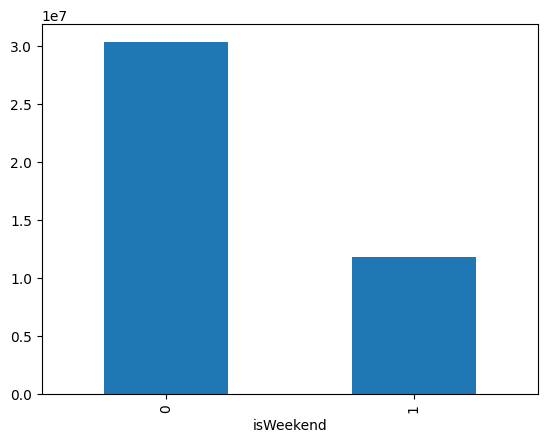

In [134]:
df_transformed_copy.groupby('isWeekend')['purchaseValue'].mean().plot(kind='bar')

<Axes: xlabel='dayofweek'>

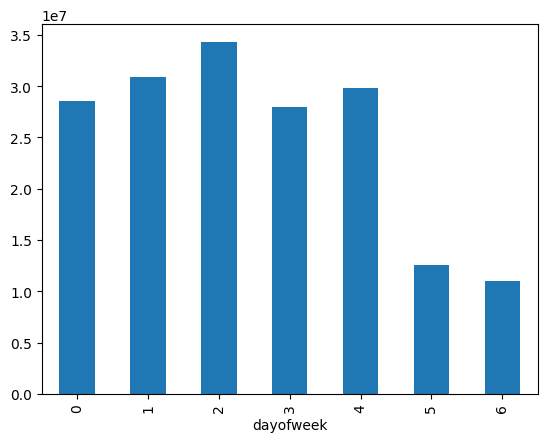

In [135]:
df_transformed_copy.groupby('dayofweek')['purchaseValue'].mean().plot(kind='bar')

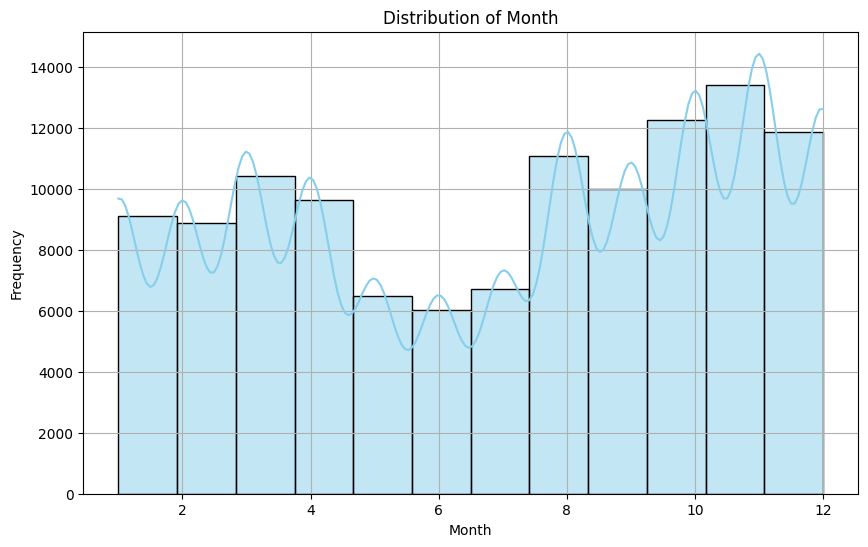

In [136]:
df_transformed_copy["month"] = df_transformed_copy["sessionStart"].dt.month
df_transformed_copy["month"].head()
plt.figure(figsize=(10, 6))
sns.histplot(df_transformed_copy['month'], bins=12, kde=True, color='skyblue')
plt.title("Distribution of Month")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [137]:
# Step: Map each month to a season
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"


In [138]:
# Apply the mapping to the 'month' column
df_transformed_copy["season"] = df_transformed_copy["month"].apply(map_month_to_season)

# (Optional) Preview the result
print(df_transformed_copy[["month", "season"]].head())

   month  season
0      7  Summer
1      5  Spring
2     10    Fall
3      1  Winter
4     10    Fall


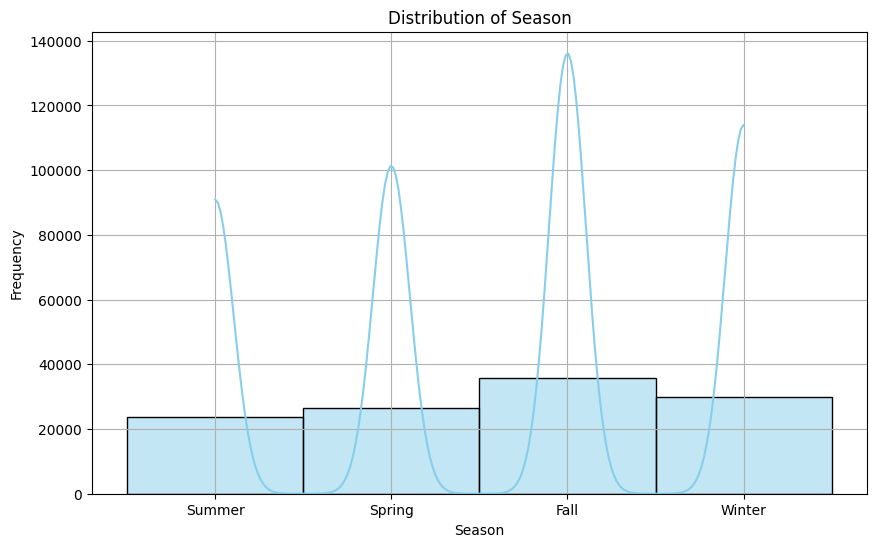

In [139]:
plt.figure(figsize=(10, 6))
sns.histplot(df_transformed_copy['season'], bins=24, kde=True, color='skyblue') 
plt.title("Distribution of Season")
plt.xlabel("Season")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Feature engineering

In [140]:
df_transformed["totals.bounces"] = df_transformed["totals.bounces"].astype(int)

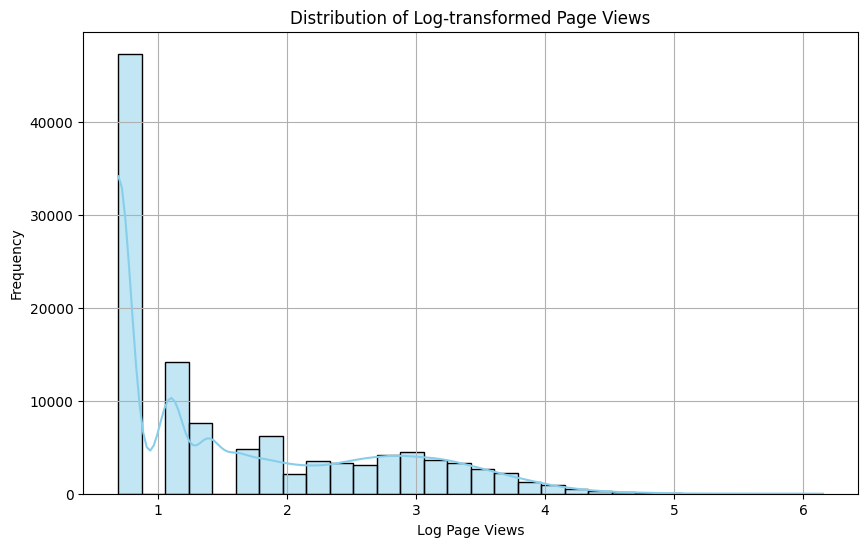

In [141]:
df_copy = df_transformed.copy()
df_copy["log_pageViews"] = np.log1p(df_copy["pageViews"])
df_copy["log_pageViews"].head()
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['log_pageViews'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Log-transformed Page Views")
plt.xlabel("Log Page Views")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

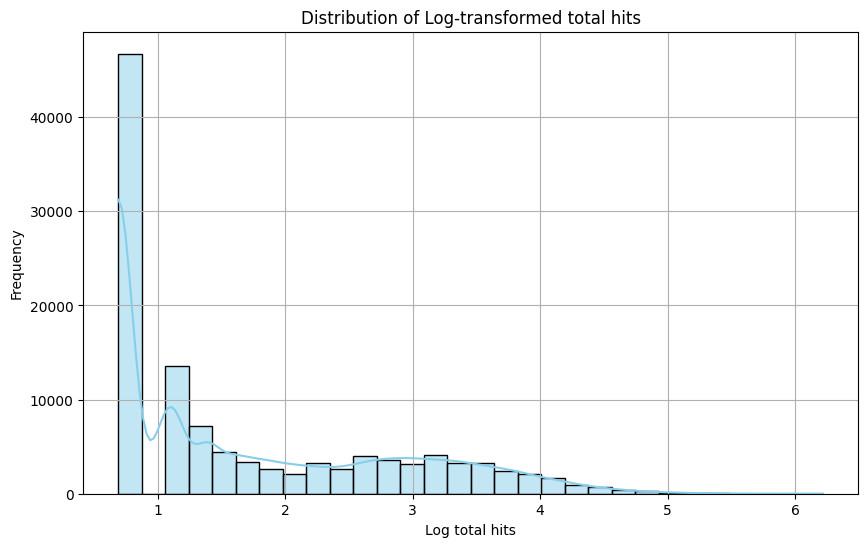

In [162]:
df_copy["log_totalhits"] = np.log1p(df_copy["totalHits"])
df_copy["log_totalhits"].head()
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['log_totalhits'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Log-transformed total hits")
plt.xlabel("Log total hits")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

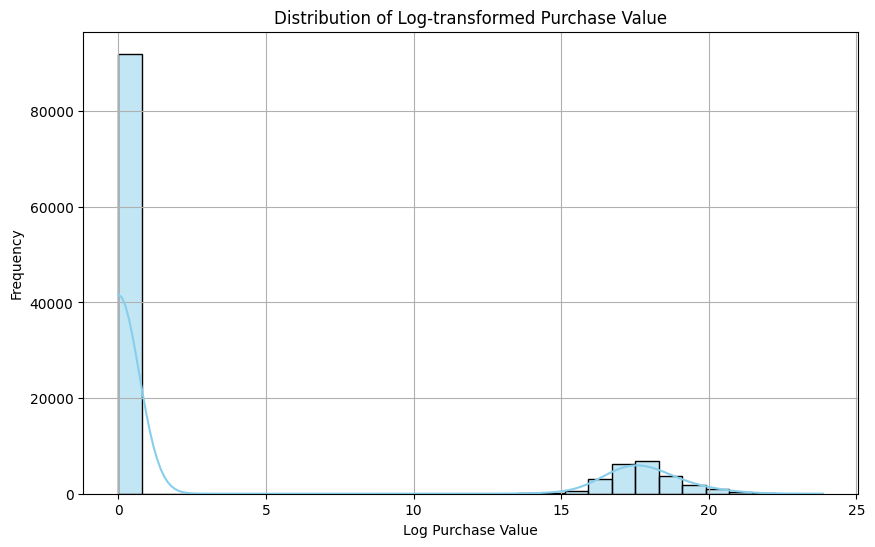

In [143]:
df_copy["log_purchaseValue"] = np.log1p(df_copy["purchaseValue"])
df_copy["log_purchaseValue"].head()
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['log_purchaseValue'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Log-transformed Purchase Value")
plt.xlabel("Log Purchase Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [153]:
def feature_engineering(df, timestamp_col="sessionStart"):
    #Behavioral Features
    df["is_returning_user"] = (df["sessionNumber"] > 1).astype(int)
    df["page_per_hit"] = df["pageViews"] / (df["totalHits"] + 1e-5)  # Avoid division by zero

    # log transformation
    df["log_pageViews"] = np.log1p(df["pageViews"])
    df["log_totalHits"] = np.log1p(df["totalHits"])
    df["log_purchaseValue"] = np.log1p(df["purchaseValue"])

    # interaction features
    df["pageViews_totalHits"] = df["pageViews"] * df["totalHits"]
    df["session_page_interaction"] = df["sessionNumber"] * df["pageViews"]
    df["pageViews_per_session"] = df["pageViews"] / (df["sessionNumber"] + 1e-5)
    df["returning_hits_log"] = df["log_totalHits"] * df["is_returning_user"]

    # Temporal Features

    # 1. Convert to datetime
    df["sessionStart_dt"] = pd.to_datetime(df[timestamp_col], unit='s')

    # 2. Hour of day
    df["hour"] = df["sessionStart_dt"].dt.hour

    # 3. Day of week (0=Monday, 6=Sunday)
    df["dayofweek"] = df["sessionStart_dt"].dt.dayofweek

    # 4. Is weekend (Saturday=5 or Sunday=6)
    df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)

    # 5. Month
    df["month"] = df["sessionStart_dt"].dt.month

    # 6. Season
    def map_month_to_season(month):
        if month in [12, 1, 2]:
            return "Winter"
        elif month in [3, 4, 5]:
            return "Spring"
        elif month in [6, 7, 8]:
            return "Summer"
        else:
            return "Fall"

    df["season"] = df["month"].apply(map_month_to_season)

    return df






In [163]:
df = feature_engineering(df_transformed)

## droping purchave value to prevent data leakage

In [ ]:
# df = df.drop("purchaseValue", axis=1)

In [157]:
df.isnull().sum()

trafficSource.isTrueDirect    0
browser                       0
geoCluster                    0
geoNetwork.networkDomain      0
sessionNumber                 0
trafficSource                 0
os                            0
geoNetwork.subContinent       0
trafficSource.medium          0
locationCountry               0
pageViews                     0
totals.bounces                0
deviceType                    0
userChannel                   0
totalHits                     0
sessionStart                  0
geoNetwork.continent          0
new_visits                    0
is_returning_user             0
page_per_hit                  0
log_pageViews                 0
log_totalHits                 0
log_purchaseValue             0
pageViews_totalHits           0
session_page_interaction      0
pageViews_per_session         0
returning_hits_log            0
sessionStart_dt               0
hour                          0
dayofweek                     0
is_weekend                    0
month   

# MODEL TRAINING

In [158]:
! pip install catboost scikit-learn

In [159]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Define features (drop target and any identifiers you don't want)
X = df.drop(columns=["log_purchaseValue", "sessionStart"])  # Drop target + datetime
y = df["log_purchaseValue"]  # Use log-transformed target

# Identify categorical features (CatBoost can handle raw object-type columns)
cat_features = X.select_dtypes(include='object').columns.tolist()

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base CatBoost model
model = CatBoostRegressor(
    loss_function='RMSE',
    random_state=42,
    verbose=0
)

# Define hyperparameter space
param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.1, 0.2],
    'iterations': [500, 700, 1000],
    'l2_leaf_reg': [1, 3, 5, 9],
    'bagging_temperature': [0.2, 0.5, 1.0]
}

# Wrap in RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=15,
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit with early stopping
random_search.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    early_stopping_rounds=50
)

# Best model evaluation
best_model = random_search.best_estimator_
y_pred_log = best_model.predict(X_val)
y_pred_actual = np.expm1(y_pred_log)  # Convert back to original scale
y_actual = np.expm1(y_val)

r2 = r2_score(y_actual, y_pred_actual)
print("✅ Best Parameters:", random_search.best_params_)
print("📈 Validation R² Score (actual scale):", round(r2, 4))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
✅ Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 10, 'bagging_temperature': 0.5}
📈 Validation R² Score (actual scale): 0.0064


In [164]:
df["purchaseValue"].describe()

count    1.160230e+05
mean     2.656393e+07
std      2.051825e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: purchaseValue, dtype: float64

In [167]:
threshold = df["sessionNumber"].quantile(0.75)
top_25_percent = df[df["sessionNumber"] >= threshold]
top_25_percent["purchaseValue"].describe()

count    3.550500e+04
mean     6.459090e+07
std      3.532943e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.159000e+07
max      2.312950e+10
Name: purchaseValue, dtype: float64